In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
# after running this cell upload the 'makeHistoricalData.py' file

from google.colab import files
files.upload()

Saving makeHistoricalData.py to makeHistoricalData.py


{'makeHistoricalData.py': b'import pandas as pd\nimport numpy as np\n\n# h is the number of days before day (t)\n# r indicates how many days after day (t) --> target-day = day(t+r)\n# target could be number of deaths or number of confirmed \ndef makeHistoricalData(h, r, target, feature_selection):\n        \'\'\' in this code when h is 1, it means there is no history and we have just one column for each covariate\n        so when h is 0, we put h equal to 1, because when h is 0 that means there no history (as when h is 1) \'\'\'\n        if h == 0:\n                h = 1\n        \n        independantOfTimeData = pd.read_csv(\'/content/drive/My Drive/full-fixed-data.csv\')\n        timeDeapandantData = pd.read_csv(\'/content/drive/My Drive/full-temporal-data.csv\')\n\n        allData = pd.merge(independantOfTimeData, timeDeapandantData, on=\'county_fips\')\n        allData = allData.sort_values(by=[\'date\', \'county_fips\'])\n        allData = allData.reset_index(drop=True)\n        #

In [ ]:
# this cell creates two folders to save the results in

!rm -rf Results/
!mkdir Results

!rm -rf Plots/
!mkdir Plots

Working on county_fips =  36043  and h =  1
(80, 1, 10) (14, 1, 10) (14, 1, 10)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 26ms/step - loss: 0.0958 - val_loss: 0.0876
Epoch 2/50
80/80 [==============================] - 0s 544us/step - loss: 0.0771 - val_loss: 0.0654
Epoch 3/50
80/80 [==============================] - 0s 505us/step - loss: 0.0576 - val_loss: 0.0620
Epoch 4/50
80/80 [==============================] - 0s 498us/step - loss: 0.0600 - val_loss: 0.0587
Epoch 5/50
80/80 [==============================] - 0s 490us/step - loss: 0.0555 - val_loss: 0.0573
Epoch 6/50
80/80 [==============================] - 0s 523us/step - loss: 0.0525 - val_loss: 0.0579
Epoch 7/50
80/80 [==============================] - 0s 522us/step - loss: 0.0524 - val_loss: 0.0584
Epoch 8/50
80/80 [==============================] - 0s 521us/step - loss: 0.0526 - val_loss: 0.0585
Epoch 9/50
80/80 [==============================] - 0s 533u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  22079  and h =  2
(73, 1, 20) (14, 1, 20) (14, 1, 20)
(73,) (14,) (14,)
Train on 73 samples, validate on 14 samples
Epoch 1/50
73/73 [==============================] - 3s 41ms/step - loss: 0.0314 - val_loss: 0.1228
Epoch 2/50
73/73 [==============================] - 0s 913us/step - loss: 0.0224 - val_loss: 0.0921
Epoch 3/50
73/73 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0835
Epoch 4/50
73/73 [==============================] - 0s 945us/step - loss: 0.0223 - val_loss: 0.0883
Epoch 5/50
73/73 [==============================] - 0s 913us/step - loss: 0.0207 - val_loss: 0.0938
Epoch 6/50
73/73 [==============================] - 0s 909us/step - loss: 0.0197 - val_loss: 0.0978
Epoch 7/50
73/73 [==============================] - 0s 964us/step - loss: 0.0194 - val_loss: 0.1007
Epoch 8/50
73/73 [==============================] - 0s 943us/step - loss: 0.0194 - val_loss: 0.1024
Epoch 9/50
73/73 [==============================] - 0s 922us/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  8035  and h =  2
(85, 1, 20) (14, 1, 20) (14, 1, 20)
(85,) (14,) (14,)
Train on 85 samples, validate on 14 samples
Epoch 1/50
85/85 [==============================] - 3s 33ms/step - loss: 0.1551 - val_loss: 0.2180
Epoch 2/50
85/85 [==============================] - 0s 509us/step - loss: 0.1239 - val_loss: 0.1551
Epoch 3/50
85/85 [==============================] - 0s 471us/step - loss: 0.0845 - val_loss: 0.0840
Epoch 4/50
85/85 [==============================] - 0s 469us/step - loss: 0.0602 - val_loss: 0.0821
Epoch 5/50
85/85 [==============================] - 0s 463us/step - loss: 0.0820 - val_loss: 0.0867
Epoch 6/50
85/85 [==============================] - 0s 497us/step - loss: 0.0605 - val_loss: 0.1027
Epoch 7/50
85/85 [==============================] - 0s 497us/step - loss: 0.0619 - val_loss: 0.1091
Epoch 8/50
85/85 [==============================] - 0s 509us/step - loss: 0.0641 - val_loss: 0.1082
Epoch 9/50
85/85 [==============================] - 0s 512us

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  37077  and h =  2
(71, 1, 20) (14, 1, 20) (14, 1, 20)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 31ms/step - loss: 0.0359 - val_loss: 0.0681
Epoch 2/50
71/71 [==============================] - 0s 573us/step - loss: 0.0280 - val_loss: 0.0605
Epoch 3/50
71/71 [==============================] - 0s 508us/step - loss: 0.0261 - val_loss: 0.0605
Epoch 4/50
71/71 [==============================] - 0s 512us/step - loss: 0.0279 - val_loss: 0.0605
Epoch 5/50
71/71 [==============================] - 0s 497us/step - loss: 0.0265 - val_loss: 0.0610
Epoch 6/50
71/71 [==============================] - 0s 548us/step - loss: 0.0257 - val_loss: 0.0617
Epoch 7/50
71/71 [==============================] - 0s 597us/step - loss: 0.0255 - val_loss: 0.0623
Epoch 8/50
71/71 [==============================] - 0s 577us/step - loss: 0.0255 - val_loss: 0.0626
Epoch 9/50
71/71 [==============================] - 0s 578u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  38009  and h =  2
(12, 1, 20) (14, 1, 20) (14, 1, 20)
(12,) (14,) (14,)
Train on 12 samples, validate on 14 samples
Epoch 1/50
12/12 [==============================] - 2s 205ms/step - loss: 0.1667 - val_loss: 0.0667
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.0700
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1022
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1472 - val_loss: 0.0935
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.0815
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.0758
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.0734
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.0725
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  13033  and h =  2
(69, 1, 20) (14, 1, 20) (14, 1, 20)
(69,) (14,) (14,)
Train on 69 samples, validate on 14 samples
Epoch 1/50
69/69 [==============================] - 2s 32ms/step - loss: 0.0850 - val_loss: 0.3213
Epoch 2/50
69/69 [==============================] - 0s 601us/step - loss: 0.0707 - val_loss: 0.2760
Epoch 3/50
69/69 [==============================] - 0s 550us/step - loss: 0.0601 - val_loss: 0.2330
Epoch 4/50
69/69 [==============================] - 0s 525us/step - loss: 0.0762 - val_loss: 0.2503
Epoch 5/50
69/69 [==============================] - 0s 525us/step - loss: 0.0627 - val_loss: 0.2658
Epoch 6/50
69/69 [==============================] - 0s 630us/step - loss: 0.0601 - val_loss: 0.2748
Epoch 7/50
69/69 [==============================] - 0s 549us/step - loss: 0.0602 - val_loss: 0.2790
Epoch 8/50
69/69 [==============================] - 0s 563us/step - loss: 0.0605 - val_loss: 0.2799
Epoch 9/50
69/69 [==============================] - 0s 574u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36043  and h =  3
(80, 1, 30) (14, 1, 30) (14, 1, 30)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 3s 32ms/step - loss: 0.0958 - val_loss: 0.0869
Epoch 2/50
80/80 [==============================] - 0s 535us/step - loss: 0.0765 - val_loss: 0.0643
Epoch 3/50
80/80 [==============================] - 0s 482us/step - loss: 0.0564 - val_loss: 0.0669
Epoch 4/50
80/80 [==============================] - 0s 491us/step - loss: 0.0655 - val_loss: 0.0584
Epoch 5/50
80/80 [==============================] - 0s 493us/step - loss: 0.0541 - val_loss: 0.0575
Epoch 6/50
80/80 [==============================] - 0s 533us/step - loss: 0.0522 - val_loss: 0.0584
Epoch 7/50
80/80 [==============================] - 0s 526us/step - loss: 0.0526 - val_loss: 0.0588
Epoch 8/50
80/80 [==============================] - 0s 521us/step - loss: 0.0528 - val_loss: 0.0586
Epoch 9/50
80/80 [==============================] - 0s 508u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36055  and h =  3
(80, 1, 30) (14, 1, 30) (14, 1, 30)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 27ms/step - loss: 0.1630 - val_loss: 0.1777
Epoch 2/50
80/80 [==============================] - 0s 647us/step - loss: 0.1305 - val_loss: 0.1263
Epoch 3/50
80/80 [==============================] - 0s 531us/step - loss: 0.0883 - val_loss: 0.0711
Epoch 4/50
80/80 [==============================] - 0s 488us/step - loss: 0.0506 - val_loss: 0.1629
Epoch 5/50
80/80 [==============================] - 0s 489us/step - loss: 0.1669 - val_loss: 0.0711
Epoch 6/50
80/80 [==============================] - 0s 517us/step - loss: 0.0596 - val_loss: 0.0766
Epoch 7/50
80/80 [==============================] - 0s 532us/step - loss: 0.0543 - val_loss: 0.0883
Epoch 8/50
80/80 [==============================] - 0s 521us/step - loss: 0.0612 - val_loss: 0.0938
Epoch 9/50
80/80 [==============================] - 0s 493u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36059  and h =  3
(87, 1, 30) (14, 1, 30) (14, 1, 30)
(87,) (14,) (14,)
Train on 87 samples, validate on 14 samples
Epoch 1/50
87/87 [==============================] - 2s 28ms/step - loss: 0.1127 - val_loss: 0.2355
Epoch 2/50
87/87 [==============================] - 0s 500us/step - loss: 0.0914 - val_loss: 0.1750
Epoch 3/50
87/87 [==============================] - 0s 448us/step - loss: 0.0667 - val_loss: 0.0926
Epoch 4/50
87/87 [==============================] - 0s 448us/step - loss: 0.0610 - val_loss: 0.0954
Epoch 5/50
87/87 [==============================] - 0s 449us/step - loss: 0.0601 - val_loss: 0.1140
Epoch 6/50
87/87 [==============================] - 0s 486us/step - loss: 0.0563 - val_loss: 0.1256
Epoch 7/50
87/87 [==============================] - 0s 452us/step - loss: 0.0567 - val_loss: 0.1292
Epoch 8/50
87/87 [==============================] - 0s 593us/step - loss: 0.0569 - val_loss: 0.1276
Epoch 9/50
87/87 [==============================] - 0s 493u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  41053  and h =  3
(81, 1, 30) (14, 1, 30) (14, 1, 30)
(81,) (14,) (14,)
Train on 81 samples, validate on 14 samples
Epoch 1/50
81/81 [==============================] - 2s 27ms/step - loss: 0.0208 - val_loss: 0.1240
Epoch 2/50
81/81 [==============================] - 0s 523us/step - loss: 0.0170 - val_loss: 0.1134
Epoch 3/50
81/81 [==============================] - 0s 471us/step - loss: 0.0191 - val_loss: 0.1154
Epoch 4/50
81/81 [==============================] - 0s 489us/step - loss: 0.0182 - val_loss: 0.1208
Epoch 5/50
81/81 [==============================] - 0s 494us/step - loss: 0.0171 - val_loss: 0.1276
Epoch 6/50
81/81 [==============================] - 0s 528us/step - loss: 0.0173 - val_loss: 0.1283
Epoch 7/50
81/81 [==============================] - 0s 698us/step - loss: 0.0174 - val_loss: 0.1229
Epoch 8/50
81/81 [==============================] - 0s 539us/step - loss: 0.0170 - val_loss: 0.1180
Epoch 9/50
81/81 [==============================] - 0s 523u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  45003  and h =  3
(72, 1, 30) (14, 1, 30) (14, 1, 30)
(72,) (14,) (14,)
Train on 72 samples, validate on 14 samples
Epoch 1/50
72/72 [==============================] - 2s 35ms/step - loss: 0.0775 - val_loss: 0.1527
Epoch 2/50
72/72 [==============================] - 0s 574us/step - loss: 0.0612 - val_loss: 0.1188
Epoch 3/50
72/72 [==============================] - 0s 518us/step - loss: 0.0470 - val_loss: 0.0915
Epoch 4/50
72/72 [==============================] - 0s 549us/step - loss: 0.0545 - val_loss: 0.0947
Epoch 5/50
72/72 [==============================] - 0s 513us/step - loss: 0.0482 - val_loss: 0.1011
Epoch 6/50
72/72 [==============================] - 0s 540us/step - loss: 0.0452 - val_loss: 0.1059
Epoch 7/50
72/72 [==============================] - 0s 563us/step - loss: 0.0449 - val_loss: 0.1084
Epoch 8/50
72/72 [==============================] - 0s 705us/step - loss: 0.0450 - val_loss: 0.1092
Epoch 9/50
72/72 [==============================] - 0s 603u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  50011  and h =  3
(71, 1, 30) (14, 1, 30) (14, 1, 30)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 30ms/step - loss: 0.0181 - val_loss: 0.0666
Epoch 2/50
71/71 [==============================] - 0s 681us/step - loss: 0.0164 - val_loss: 0.0663
Epoch 3/50
71/71 [==============================] - 0s 585us/step - loss: 0.0170 - val_loss: 0.0666
Epoch 4/50
71/71 [==============================] - 0s 577us/step - loss: 0.0164 - val_loss: 0.0681
Epoch 5/50
71/71 [==============================] - 0s 577us/step - loss: 0.0165 - val_loss: 0.0684
Epoch 6/50
71/71 [==============================] - 0s 597us/step - loss: 0.0166 - val_loss: 0.0674
Epoch 7/50
71/71 [==============================] - 0s 625us/step - loss: 0.0163 - val_loss: 0.0667
Epoch 8/50
71/71 [==============================] - 0s 622us/step - loss: 0.0164 - val_loss: 0.0666
Epoch 9/50
71/71 [==============================] - 0s 641u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  20169  and h =  3
(62, 1, 30) (14, 1, 30) (14, 1, 30)
(62,) (14,) (14,)
Train on 62 samples, validate on 14 samples
Epoch 1/50
62/62 [==============================] - 2s 40ms/step - loss: 0.0860 - val_loss: 0.0666
Epoch 2/50
62/62 [==============================] - 0s 630us/step - loss: 0.0726 - val_loss: 0.0702
Epoch 3/50
62/62 [==============================] - 0s 580us/step - loss: 0.0635 - val_loss: 0.1002
Epoch 4/50
62/62 [==============================] - 0s 574us/step - loss: 0.0743 - val_loss: 0.0850
Epoch 5/50
62/62 [==============================] - 0s 634us/step - loss: 0.0666 - val_loss: 0.0764
Epoch 6/50
62/62 [==============================] - 0s 605us/step - loss: 0.0638 - val_loss: 0.0728
Epoch 7/50
62/62 [==============================] - 0s 788us/step - loss: 0.0633 - val_loss: 0.0713
Epoch 8/50
62/62 [==============================] - 0s 784us/step - loss: 0.0634 - val_loss: 0.0705
Epoch 9/50
62/62 [==============================] - 0s 660u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  21163  and h =  3
(58, 1, 30) (14, 1, 30) (14, 1, 30)
(58,) (14,) (14,)
Train on 58 samples, validate on 14 samples
Epoch 1/50
58/58 [==============================] - 2s 37ms/step - loss: 0.1422 - val_loss: 0.1296
Epoch 2/50
58/58 [==============================] - 0s 718us/step - loss: 0.1244 - val_loss: 0.1231
Epoch 3/50
58/58 [==============================] - 0s 633us/step - loss: 0.1103 - val_loss: 0.1518
Epoch 4/50
58/58 [==============================] - 0s 642us/step - loss: 0.1249 - val_loss: 0.1329
Epoch 5/50
58/58 [==============================] - 0s 620us/step - loss: 0.1129 - val_loss: 0.1253
Epoch 6/50
58/58 [==============================] - 0s 628us/step - loss: 0.1097 - val_loss: 0.1233
Epoch 7/50
58/58 [==============================] - 0s 688us/step - loss: 0.1096 - val_loss: 0.1230
Epoch 8/50
58/58 [==============================] - 0s 676us/step - loss: 0.1098 - val_loss: 0.1232
Epoch 9/50
58/58 [==============================] - 0s 684u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  22079  and h =  3
(73, 1, 30) (14, 1, 30) (14, 1, 30)
(73,) (14,) (14,)
Train on 73 samples, validate on 14 samples
Epoch 1/50
73/73 [==============================] - 3s 35ms/step - loss: 0.0315 - val_loss: 0.1245
Epoch 2/50
73/73 [==============================] - 0s 640us/step - loss: 0.0228 - val_loss: 0.0960
Epoch 3/50
73/73 [==============================] - 0s 527us/step - loss: 0.0195 - val_loss: 0.0815
Epoch 4/50
73/73 [==============================] - 0s 607us/step - loss: 0.0232 - val_loss: 0.0861
Epoch 5/50
73/73 [==============================] - 0s 508us/step - loss: 0.0213 - val_loss: 0.0921
Epoch 6/50
73/73 [==============================] - 0s 548us/step - loss: 0.0199 - val_loss: 0.0964
Epoch 7/50
73/73 [==============================] - 0s 508us/step - loss: 0.0195 - val_loss: 0.0994
Epoch 8/50
73/73 [==============================] - 0s 515us/step - loss: 0.0194 - val_loss: 0.1014
Epoch 9/50
73/73 [==============================] - 0s 554u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  8035  and h =  3
(85, 1, 30) (14, 1, 30) (14, 1, 30)
(85,) (14,) (14,)
Train on 85 samples, validate on 14 samples
Epoch 1/50
85/85 [==============================] - 2s 25ms/step - loss: 0.1551 - val_loss: 0.2180
Epoch 2/50
85/85 [==============================] - 0s 533us/step - loss: 0.1240 - val_loss: 0.1538
Epoch 3/50
85/85 [==============================] - 0s 481us/step - loss: 0.0844 - val_loss: 0.0827
Epoch 4/50
85/85 [==============================] - 0s 458us/step - loss: 0.0633 - val_loss: 0.0806
Epoch 5/50
85/85 [==============================] - 0s 469us/step - loss: 0.0702 - val_loss: 0.0887
Epoch 6/50
85/85 [==============================] - 0s 511us/step - loss: 0.0603 - val_loss: 0.1001
Epoch 7/50
85/85 [==============================] - 0s 501us/step - loss: 0.0617 - val_loss: 0.1036
Epoch 8/50
85/85 [==============================] - 0s 498us/step - loss: 0.0626 - val_loss: 0.1017
Epoch 9/50
85/85 [==============================] - 0s 524us

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  37077  and h =  3
(71, 1, 30) (14, 1, 30) (14, 1, 30)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 30ms/step - loss: 0.0359 - val_loss: 0.0676
Epoch 2/50
71/71 [==============================] - 0s 571us/step - loss: 0.0277 - val_loss: 0.0606
Epoch 3/50
71/71 [==============================] - 0s 509us/step - loss: 0.0262 - val_loss: 0.0607
Epoch 4/50
71/71 [==============================] - 0s 523us/step - loss: 0.0281 - val_loss: 0.0605
Epoch 5/50
71/71 [==============================] - 0s 503us/step - loss: 0.0269 - val_loss: 0.0608
Epoch 6/50
71/71 [==============================] - 0s 504us/step - loss: 0.0260 - val_loss: 0.0613
Epoch 7/50
71/71 [==============================] - 0s 545us/step - loss: 0.0256 - val_loss: 0.0621
Epoch 8/50
71/71 [==============================] - 0s 538us/step - loss: 0.0254 - val_loss: 0.0630
Epoch 9/50
71/71 [==============================] - 0s 570u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  38009  and h =  3
(12, 1, 30) (14, 1, 30) (14, 1, 30)
(12,) (14,) (14,)
Train on 12 samples, validate on 14 samples
Epoch 1/50
12/12 [==============================] - 3s 210ms/step - loss: 0.1667 - val_loss: 0.0666
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.0698
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.0970
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.0931
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.0832
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.0773
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1383 - val_loss: 0.0745
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1376 - val_loss: 0.0732
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  13033  and h =  3
(69, 1, 30) (14, 1, 30) (14, 1, 30)
(69,) (14,) (14,)
Train on 69 samples, validate on 14 samples
Epoch 1/50
69/69 [==============================] - 2s 32ms/step - loss: 0.0850 - val_loss: 0.3221
Epoch 2/50
69/69 [==============================] - 0s 512us/step - loss: 0.0711 - val_loss: 0.2794
Epoch 3/50
69/69 [==============================] - 0s 508us/step - loss: 0.0605 - val_loss: 0.2377
Epoch 4/50
69/69 [==============================] - 0s 513us/step - loss: 0.0712 - val_loss: 0.2498
Epoch 5/50
69/69 [==============================] - 0s 523us/step - loss: 0.0629 - val_loss: 0.2624
Epoch 6/50
69/69 [==============================] - 0s 508us/step - loss: 0.0603 - val_loss: 0.2703
Epoch 7/50
69/69 [==============================] - 0s 592us/step - loss: 0.0600 - val_loss: 0.2746
Epoch 8/50
69/69 [==============================] - 0s 568us/step - loss: 0.0601 - val_loss: 0.2765
Epoch 9/50
69/69 [==============================] - 0s 562u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36043  and h =  4
(80, 1, 40) (14, 1, 40) (14, 1, 40)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 31ms/step - loss: 0.0958 - val_loss: 0.0861
Epoch 2/50
80/80 [==============================] - 0s 523us/step - loss: 0.0757 - val_loss: 0.0632
Epoch 3/50
80/80 [==============================] - 0s 464us/step - loss: 0.0555 - val_loss: 0.0740
Epoch 4/50
80/80 [==============================] - 0s 467us/step - loss: 0.0715 - val_loss: 0.0589
Epoch 5/50
80/80 [==============================] - 0s 475us/step - loss: 0.0544 - val_loss: 0.0577
Epoch 6/50
80/80 [==============================] - 0s 486us/step - loss: 0.0522 - val_loss: 0.0588
Epoch 7/50
80/80 [==============================] - 0s 485us/step - loss: 0.0528 - val_loss: 0.0593
Epoch 8/50
80/80 [==============================] - 0s 611us/step - loss: 0.0531 - val_loss: 0.0592
Epoch 9/50
80/80 [==============================] - 0s 507u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36055  and h =  4
(80, 1, 40) (14, 1, 40) (14, 1, 40)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 26ms/step - loss: 0.1629 - val_loss: 0.1762
Epoch 2/50
80/80 [==============================] - 0s 562us/step - loss: 0.1293 - val_loss: 0.1221
Epoch 3/50
80/80 [==============================] - 0s 502us/step - loss: 0.0856 - val_loss: 0.0698
Epoch 4/50
80/80 [==============================] - 0s 489us/step - loss: 0.0522 - val_loss: 0.1260
Epoch 5/50
80/80 [==============================] - 0s 483us/step - loss: 0.1097 - val_loss: 0.0698
Epoch 6/50
80/80 [==============================] - 0s 525us/step - loss: 0.0543 - val_loss: 0.0766
Epoch 7/50
80/80 [==============================] - 0s 483us/step - loss: 0.0547 - val_loss: 0.0845
Epoch 8/50
80/80 [==============================] - 0s 540us/step - loss: 0.0590 - val_loss: 0.0871
Epoch 9/50
80/80 [==============================] - 0s 553u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36059  and h =  4
(87, 1, 40) (14, 1, 40) (14, 1, 40)
(87,) (14,) (14,)
Train on 87 samples, validate on 14 samples
Epoch 1/50
87/87 [==============================] - 2s 28ms/step - loss: 0.1127 - val_loss: 0.2319
Epoch 2/50
87/87 [==============================] - 0s 492us/step - loss: 0.0897 - val_loss: 0.1675
Epoch 3/50
87/87 [==============================] - 0s 442us/step - loss: 0.0642 - val_loss: 0.0853
Epoch 4/50
87/87 [==============================] - 0s 445us/step - loss: 0.0666 - val_loss: 0.1010
Epoch 5/50
87/87 [==============================] - 0s 448us/step - loss: 0.0588 - val_loss: 0.1193
Epoch 6/50
87/87 [==============================] - 0s 493us/step - loss: 0.0567 - val_loss: 0.1289
Epoch 7/50
87/87 [==============================] - 0s 480us/step - loss: 0.0572 - val_loss: 0.1314
Epoch 8/50
87/87 [==============================] - 0s 485us/step - loss: 0.0574 - val_loss: 0.1299
Epoch 9/50
87/87 [==============================] - 0s 494u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  41053  and h =  4
(81, 1, 40) (14, 1, 40) (14, 1, 40)
(81,) (14,) (14,)
Train on 81 samples, validate on 14 samples
Epoch 1/50
81/81 [==============================] - 2s 26ms/step - loss: 0.0208 - val_loss: 0.1250
Epoch 2/50
81/81 [==============================] - 0s 565us/step - loss: 0.0171 - val_loss: 0.1136
Epoch 3/50
81/81 [==============================] - 0s 520us/step - loss: 0.0190 - val_loss: 0.1155
Epoch 4/50
81/81 [==============================] - 0s 466us/step - loss: 0.0182 - val_loss: 0.1198
Epoch 5/50
81/81 [==============================] - 0s 472us/step - loss: 0.0172 - val_loss: 0.1249
Epoch 6/50
81/81 [==============================] - 0s 504us/step - loss: 0.0170 - val_loss: 0.1281
Epoch 7/50
81/81 [==============================] - 0s 559us/step - loss: 0.0173 - val_loss: 0.1260
Epoch 8/50
81/81 [==============================] - 0s 568us/step - loss: 0.0171 - val_loss: 0.1208
Epoch 9/50
81/81 [==============================] - 0s 539u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  45003  and h =  4
(72, 1, 40) (14, 1, 40) (14, 1, 40)
(72,) (14,) (14,)
Train on 72 samples, validate on 14 samples
Epoch 1/50
72/72 [==============================] - 2s 34ms/step - loss: 0.0775 - val_loss: 0.1525
Epoch 2/50
72/72 [==============================] - 0s 572us/step - loss: 0.0611 - val_loss: 0.1185
Epoch 3/50
72/72 [==============================] - 0s 509us/step - loss: 0.0470 - val_loss: 0.0908
Epoch 4/50
72/72 [==============================] - 0s 485us/step - loss: 0.0553 - val_loss: 0.0944
Epoch 5/50
72/72 [==============================] - 0s 589us/step - loss: 0.0483 - val_loss: 0.1007
Epoch 6/50
72/72 [==============================] - 0s 480us/step - loss: 0.0453 - val_loss: 0.1052
Epoch 7/50
72/72 [==============================] - 0s 541us/step - loss: 0.0449 - val_loss: 0.1077
Epoch 8/50
72/72 [==============================] - 0s 538us/step - loss: 0.0450 - val_loss: 0.1090
Epoch 9/50
72/72 [==============================] - 0s 528u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  50011  and h =  4
(71, 1, 40) (14, 1, 40) (14, 1, 40)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 29ms/step - loss: 0.0181 - val_loss: 0.0665
Epoch 2/50
71/71 [==============================] - 0s 513us/step - loss: 0.0165 - val_loss: 0.0663
Epoch 3/50
71/71 [==============================] - 0s 511us/step - loss: 0.0172 - val_loss: 0.0665
Epoch 4/50
71/71 [==============================] - 0s 508us/step - loss: 0.0165 - val_loss: 0.0679
Epoch 5/50
71/71 [==============================] - 0s 497us/step - loss: 0.0164 - val_loss: 0.0688
Epoch 6/50
71/71 [==============================] - 0s 496us/step - loss: 0.0167 - val_loss: 0.0675
Epoch 7/50
71/71 [==============================] - 0s 538us/step - loss: 0.0164 - val_loss: 0.0667
Epoch 8/50
71/71 [==============================] - 0s 546us/step - loss: 0.0164 - val_loss: 0.0665
Epoch 9/50
71/71 [==============================] - 0s 553u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  20169  and h =  4
(62, 1, 40) (14, 1, 40) (14, 1, 40)
(62,) (14,) (14,)
Train on 62 samples, validate on 14 samples
Epoch 1/50
62/62 [==============================] - 2s 40ms/step - loss: 0.0860 - val_loss: 0.0666
Epoch 2/50
62/62 [==============================] - 0s 627us/step - loss: 0.0726 - val_loss: 0.0706
Epoch 3/50
62/62 [==============================] - 0s 571us/step - loss: 0.0635 - val_loss: 0.1007
Epoch 4/50
62/62 [==============================] - 0s 562us/step - loss: 0.0745 - val_loss: 0.0848
Epoch 5/50
62/62 [==============================] - 0s 556us/step - loss: 0.0665 - val_loss: 0.0761
Epoch 6/50
62/62 [==============================] - 0s 567us/step - loss: 0.0637 - val_loss: 0.0726
Epoch 7/50
62/62 [==============================] - 0s 611us/step - loss: 0.0633 - val_loss: 0.0709
Epoch 8/50
62/62 [==============================] - 0s 616us/step - loss: 0.0635 - val_loss: 0.0701
Epoch 9/50
62/62 [==============================] - 0s 610u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  21163  and h =  4
(58, 1, 40) (14, 1, 40) (14, 1, 40)
(58,) (14,) (14,)
Train on 58 samples, validate on 14 samples
Epoch 1/50
58/58 [==============================] - 2s 37ms/step - loss: 0.1422 - val_loss: 0.1306
Epoch 2/50
58/58 [==============================] - 0s 723us/step - loss: 0.1260 - val_loss: 0.1227
Epoch 3/50
58/58 [==============================] - 0s 654us/step - loss: 0.1117 - val_loss: 0.1415
Epoch 4/50
58/58 [==============================] - 0s 646us/step - loss: 0.1196 - val_loss: 0.1315
Epoch 5/50
58/58 [==============================] - 0s 641us/step - loss: 0.1126 - val_loss: 0.1258
Epoch 6/50
58/58 [==============================] - 0s 619us/step - loss: 0.1098 - val_loss: 0.1239
Epoch 7/50
58/58 [==============================] - 0s 743us/step - loss: 0.1095 - val_loss: 0.1233
Epoch 8/50
58/58 [==============================] - 0s 705us/step - loss: 0.1095 - val_loss: 0.1232
Epoch 9/50
58/58 [==============================] - 0s 759u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  22079  and h =  4
(73, 1, 40) (14, 1, 40) (14, 1, 40)
(73,) (14,) (14,)
Train on 73 samples, validate on 14 samples
Epoch 1/50
73/73 [==============================] - 3s 35ms/step - loss: 0.0314 - val_loss: 0.1251
Epoch 2/50
73/73 [==============================] - 0s 610us/step - loss: 0.0230 - val_loss: 0.0962
Epoch 3/50
73/73 [==============================] - 0s 569us/step - loss: 0.0195 - val_loss: 0.0813
Epoch 4/50
73/73 [==============================] - 0s 513us/step - loss: 0.0233 - val_loss: 0.0866
Epoch 5/50
73/73 [==============================] - 0s 634us/step - loss: 0.0212 - val_loss: 0.0929
Epoch 6/50
73/73 [==============================] - 0s 564us/step - loss: 0.0198 - val_loss: 0.0975
Epoch 7/50
73/73 [==============================] - 0s 557us/step - loss: 0.0194 - val_loss: 0.1006
Epoch 8/50
73/73 [==============================] - 0s 555us/step - loss: 0.0194 - val_loss: 0.1026
Epoch 9/50
73/73 [==============================] - 0s 547u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  8035  and h =  4
(85, 1, 40) (14, 1, 40) (14, 1, 40)
(85,) (14,) (14,)
Train on 85 samples, validate on 14 samples
Epoch 1/50
85/85 [==============================] - 2s 25ms/step - loss: 0.1551 - val_loss: 0.2204
Epoch 2/50
85/85 [==============================] - 0s 511us/step - loss: 0.1254 - val_loss: 0.1613
Epoch 3/50
85/85 [==============================] - 0s 453us/step - loss: 0.0879 - val_loss: 0.0882
Epoch 4/50
85/85 [==============================] - 0s 450us/step - loss: 0.0605 - val_loss: 0.0889
Epoch 5/50
85/85 [==============================] - 0s 472us/step - loss: 0.1036 - val_loss: 0.0831
Epoch 6/50
85/85 [==============================] - 0s 533us/step - loss: 0.0615 - val_loss: 0.1014
Epoch 7/50
85/85 [==============================] - 0s 529us/step - loss: 0.0617 - val_loss: 0.1120
Epoch 8/50
85/85 [==============================] - 0s 494us/step - loss: 0.0650 - val_loss: 0.1149
Epoch 9/50
85/85 [==============================] - 0s 490us

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  37077  and h =  4
(71, 1, 40) (14, 1, 40) (14, 1, 40)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 28ms/step - loss: 0.0359 - val_loss: 0.0674
Epoch 2/50
71/71 [==============================] - 0s 547us/step - loss: 0.0275 - val_loss: 0.0604
Epoch 3/50
71/71 [==============================] - 0s 490us/step - loss: 0.0265 - val_loss: 0.0605
Epoch 4/50
71/71 [==============================] - 0s 510us/step - loss: 0.0278 - val_loss: 0.0605
Epoch 5/50
71/71 [==============================] - 0s 472us/step - loss: 0.0265 - val_loss: 0.0610
Epoch 6/50
71/71 [==============================] - 0s 558us/step - loss: 0.0258 - val_loss: 0.0617
Epoch 7/50
71/71 [==============================] - 0s 547us/step - loss: 0.0255 - val_loss: 0.0625
Epoch 8/50
71/71 [==============================] - 0s 554us/step - loss: 0.0255 - val_loss: 0.0624
Epoch 9/50
71/71 [==============================] - 0s 544u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  38009  and h =  4
(12, 1, 40) (14, 1, 40) (14, 1, 40)
(12,) (14,) (14,)
Train on 12 samples, validate on 14 samples
Epoch 1/50
12/12 [==============================] - 2s 206ms/step - loss: 0.1667 - val_loss: 0.0666
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.0710
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1028
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1473 - val_loss: 0.0921
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.0802
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.0743
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.0722
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.0717
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  13033  and h =  4
(69, 1, 40) (14, 1, 40) (14, 1, 40)
(69,) (14,) (14,)
Train on 69 samples, validate on 14 samples
Epoch 1/50
69/69 [==============================] - 2s 32ms/step - loss: 0.0851 - val_loss: 0.3215
Epoch 2/50
69/69 [==============================] - 0s 605us/step - loss: 0.0709 - val_loss: 0.2789
Epoch 3/50
69/69 [==============================] - 0s 550us/step - loss: 0.0605 - val_loss: 0.2375
Epoch 4/50
69/69 [==============================] - 0s 530us/step - loss: 0.0714 - val_loss: 0.2493
Epoch 5/50
69/69 [==============================] - 0s 516us/step - loss: 0.0634 - val_loss: 0.2610
Epoch 6/50
69/69 [==============================] - 0s 517us/step - loss: 0.0605 - val_loss: 0.2682
Epoch 7/50
69/69 [==============================] - 0s 544us/step - loss: 0.0600 - val_loss: 0.2722
Epoch 8/50
69/69 [==============================] - 0s 533us/step - loss: 0.0601 - val_loss: 0.2744
Epoch 9/50
69/69 [==============================] - 0s 554u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36043  and h =  5
(80, 1, 50) (14, 1, 50) (14, 1, 50)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 30ms/step - loss: 0.0958 - val_loss: 0.0865
Epoch 2/50
80/80 [==============================] - 0s 567us/step - loss: 0.0762 - val_loss: 0.0650
Epoch 3/50
80/80 [==============================] - 0s 527us/step - loss: 0.0572 - val_loss: 0.0631
Epoch 4/50
80/80 [==============================] - 0s 476us/step - loss: 0.0614 - val_loss: 0.0591
Epoch 5/50
80/80 [==============================] - 0s 480us/step - loss: 0.0556 - val_loss: 0.0575
Epoch 6/50
80/80 [==============================] - 0s 511us/step - loss: 0.0528 - val_loss: 0.0577
Epoch 7/50
80/80 [==============================] - 0s 488us/step - loss: 0.0524 - val_loss: 0.0580
Epoch 8/50
80/80 [==============================] - 0s 499us/step - loss: 0.0525 - val_loss: 0.0581
Epoch 9/50
80/80 [==============================] - 0s 473u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36055  and h =  5
(80, 1, 50) (14, 1, 50) (14, 1, 50)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 25ms/step - loss: 0.1630 - val_loss: 0.1770
Epoch 2/50
80/80 [==============================] - 0s 517us/step - loss: 0.1298 - val_loss: 0.1226
Epoch 3/50
80/80 [==============================] - 0s 458us/step - loss: 0.0853 - val_loss: 0.0722
Epoch 4/50
80/80 [==============================] - 0s 458us/step - loss: 0.0522 - val_loss: 0.1048
Epoch 5/50
80/80 [==============================] - 0s 459us/step - loss: 0.0860 - val_loss: 0.0709
Epoch 6/50
80/80 [==============================] - 0s 467us/step - loss: 0.0529 - val_loss: 0.0794
Epoch 7/50
80/80 [==============================] - 0s 493us/step - loss: 0.0559 - val_loss: 0.0847
Epoch 8/50
80/80 [==============================] - 0s 496us/step - loss: 0.0592 - val_loss: 0.0843
Epoch 9/50
80/80 [==============================] - 0s 499u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36059  and h =  5
(87, 1, 50) (14, 1, 50) (14, 1, 50)
(87,) (14,) (14,)
Train on 87 samples, validate on 14 samples
Epoch 1/50
87/87 [==============================] - 2s 28ms/step - loss: 0.1127 - val_loss: 0.2321
Epoch 2/50
87/87 [==============================] - 0s 585us/step - loss: 0.0898 - val_loss: 0.1637
Epoch 3/50
87/87 [==============================] - 0s 509us/step - loss: 0.0629 - val_loss: 0.0769
Epoch 4/50
87/87 [==============================] - 0s 482us/step - loss: 0.0717 - val_loss: 0.1009
Epoch 5/50
87/87 [==============================] - 0s 474us/step - loss: 0.0573 - val_loss: 0.1243
Epoch 6/50
87/87 [==============================] - 0s 513us/step - loss: 0.0565 - val_loss: 0.1343
Epoch 7/50
87/87 [==============================] - 0s 489us/step - loss: 0.0576 - val_loss: 0.1354
Epoch 8/50
87/87 [==============================] - 0s 476us/step - loss: 0.0578 - val_loss: 0.1322
Epoch 9/50
87/87 [==============================] - 0s 480u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  41053  and h =  5
(81, 1, 50) (14, 1, 50) (14, 1, 50)
(81,) (14,) (14,)
Train on 81 samples, validate on 14 samples
Epoch 1/50
81/81 [==============================] - 2s 26ms/step - loss: 0.0208 - val_loss: 0.1252
Epoch 2/50
81/81 [==============================] - 0s 509us/step - loss: 0.0171 - val_loss: 0.1136
Epoch 3/50
81/81 [==============================] - 0s 455us/step - loss: 0.0190 - val_loss: 0.1157
Epoch 4/50
81/81 [==============================] - 0s 464us/step - loss: 0.0181 - val_loss: 0.1200
Epoch 5/50
81/81 [==============================] - 0s 471us/step - loss: 0.0172 - val_loss: 0.1246
Epoch 6/50
81/81 [==============================] - 0s 469us/step - loss: 0.0170 - val_loss: 0.1272
Epoch 7/50
81/81 [==============================] - 0s 495us/step - loss: 0.0172 - val_loss: 0.1252
Epoch 8/50
81/81 [==============================] - 0s 492us/step - loss: 0.0170 - val_loss: 0.1206
Epoch 9/50
81/81 [==============================] - 0s 480u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  45003  and h =  5
(72, 1, 50) (14, 1, 50) (14, 1, 50)
(72,) (14,) (14,)
Train on 72 samples, validate on 14 samples
Epoch 1/50
72/72 [==============================] - 2s 34ms/step - loss: 0.0775 - val_loss: 0.1511
Epoch 2/50
72/72 [==============================] - 0s 539us/step - loss: 0.0604 - val_loss: 0.1159
Epoch 3/50
72/72 [==============================] - 0s 612us/step - loss: 0.0462 - val_loss: 0.0921
Epoch 4/50
72/72 [==============================] - 0s 783us/step - loss: 0.0602 - val_loss: 0.0949
Epoch 5/50
72/72 [==============================] - 0s 489us/step - loss: 0.0482 - val_loss: 0.1017
Epoch 6/50
72/72 [==============================] - 0s 531us/step - loss: 0.0451 - val_loss: 0.1064
Epoch 7/50
72/72 [==============================] - 0s 534us/step - loss: 0.0449 - val_loss: 0.1086
Epoch 8/50
72/72 [==============================] - 0s 535us/step - loss: 0.0451 - val_loss: 0.1095
Epoch 9/50
72/72 [==============================] - 0s 500u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  50011  and h =  5
(71, 1, 50) (14, 1, 50) (14, 1, 50)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 30ms/step - loss: 0.0181 - val_loss: 0.0666
Epoch 2/50
71/71 [==============================] - 0s 638us/step - loss: 0.0165 - val_loss: 0.0663
Epoch 3/50
71/71 [==============================] - 0s 618us/step - loss: 0.0170 - val_loss: 0.0666
Epoch 4/50
71/71 [==============================] - 0s 621us/step - loss: 0.0165 - val_loss: 0.0678
Epoch 5/50
71/71 [==============================] - 0s 608us/step - loss: 0.0164 - val_loss: 0.0685
Epoch 6/50
71/71 [==============================] - 0s 664us/step - loss: 0.0166 - val_loss: 0.0676
Epoch 7/50
71/71 [==============================] - 0s 680us/step - loss: 0.0163 - val_loss: 0.0668
Epoch 8/50
71/71 [==============================] - 0s 647us/step - loss: 0.0163 - val_loss: 0.0666
Epoch 9/50
71/71 [==============================] - 0s 676u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  20169  and h =  5
(62, 1, 50) (14, 1, 50) (14, 1, 50)
(62,) (14,) (14,)
Train on 62 samples, validate on 14 samples
Epoch 1/50
62/62 [==============================] - 3s 41ms/step - loss: 0.0860 - val_loss: 0.0667
Epoch 2/50
62/62 [==============================] - 0s 635us/step - loss: 0.0728 - val_loss: 0.0708
Epoch 3/50
62/62 [==============================] - 0s 593us/step - loss: 0.0635 - val_loss: 0.1028
Epoch 4/50
62/62 [==============================] - 0s 711us/step - loss: 0.0757 - val_loss: 0.0838
Epoch 5/50
62/62 [==============================] - 0s 639us/step - loss: 0.0663 - val_loss: 0.0749
Epoch 6/50
62/62 [==============================] - 0s 661us/step - loss: 0.0635 - val_loss: 0.0715
Epoch 7/50
62/62 [==============================] - 0s 655us/step - loss: 0.0634 - val_loss: 0.0701
Epoch 8/50
62/62 [==============================] - 0s 685us/step - loss: 0.0637 - val_loss: 0.0696
Epoch 9/50
62/62 [==============================] - 0s 639u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  21163  and h =  5
(58, 1, 50) (14, 1, 50) (14, 1, 50)
(58,) (14,) (14,)
Train on 58 samples, validate on 14 samples
Epoch 1/50
58/58 [==============================] - 2s 36ms/step - loss: 0.1423 - val_loss: 0.1302
Epoch 2/50
58/58 [==============================] - 0s 725us/step - loss: 0.1254 - val_loss: 0.1224
Epoch 3/50
58/58 [==============================] - 0s 666us/step - loss: 0.1109 - val_loss: 0.1462
Epoch 4/50
58/58 [==============================] - 0s 614us/step - loss: 0.1234 - val_loss: 0.1313
Epoch 5/50
58/58 [==============================] - 0s 646us/step - loss: 0.1123 - val_loss: 0.1253
Epoch 6/50
58/58 [==============================] - 0s 830us/step - loss: 0.1095 - val_loss: 0.1236
Epoch 7/50
58/58 [==============================] - 0s 585us/step - loss: 0.1094 - val_loss: 0.1231
Epoch 8/50
58/58 [==============================] - 0s 699us/step - loss: 0.1096 - val_loss: 0.1230
Epoch 9/50
58/58 [==============================] - 0s 646u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  22079  and h =  5
(73, 1, 50) (14, 1, 50) (14, 1, 50)
(73,) (14,) (14,)
Train on 73 samples, validate on 14 samples
Epoch 1/50
73/73 [==============================] - 2s 28ms/step - loss: 0.0315 - val_loss: 0.1237
Epoch 2/50
73/73 [==============================] - 0s 581us/step - loss: 0.0226 - val_loss: 0.0946
Epoch 3/50
73/73 [==============================] - 0s 525us/step - loss: 0.0196 - val_loss: 0.0823
Epoch 4/50
73/73 [==============================] - 0s 519us/step - loss: 0.0229 - val_loss: 0.0868
Epoch 5/50
73/73 [==============================] - 0s 516us/step - loss: 0.0211 - val_loss: 0.0926
Epoch 6/50
73/73 [==============================] - 0s 524us/step - loss: 0.0199 - val_loss: 0.0974
Epoch 7/50
73/73 [==============================] - 0s 569us/step - loss: 0.0195 - val_loss: 0.1008
Epoch 8/50
73/73 [==============================] - 0s 577us/step - loss: 0.0194 - val_loss: 0.1026
Epoch 9/50
73/73 [==============================] - 0s 558u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  8035  and h =  5
(85, 1, 50) (14, 1, 50) (14, 1, 50)
(85,) (14,) (14,)
Train on 85 samples, validate on 14 samples
Epoch 1/50
85/85 [==============================] - 2s 29ms/step - loss: 0.1551 - val_loss: 0.2185
Epoch 2/50
85/85 [==============================] - 0s 495us/step - loss: 0.1243 - val_loss: 0.1555
Epoch 3/50
85/85 [==============================] - 0s 439us/step - loss: 0.0849 - val_loss: 0.0836
Epoch 4/50
85/85 [==============================] - 0s 448us/step - loss: 0.0646 - val_loss: 0.0818
Epoch 5/50
85/85 [==============================] - 0s 448us/step - loss: 0.0673 - val_loss: 0.0909
Epoch 6/50
85/85 [==============================] - 0s 453us/step - loss: 0.0607 - val_loss: 0.0998
Epoch 7/50
85/85 [==============================] - 0s 461us/step - loss: 0.0617 - val_loss: 0.1021
Epoch 8/50
85/85 [==============================] - 0s 470us/step - loss: 0.0622 - val_loss: 0.1005
Epoch 9/50
85/85 [==============================] - 0s 467us

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  37077  and h =  5
(71, 1, 50) (14, 1, 50) (14, 1, 50)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 29ms/step - loss: 0.0359 - val_loss: 0.0677
Epoch 2/50
71/71 [==============================] - 0s 682us/step - loss: 0.0277 - val_loss: 0.0605
Epoch 3/50
71/71 [==============================] - 0s 552us/step - loss: 0.0261 - val_loss: 0.0606
Epoch 4/50
71/71 [==============================] - 0s 542us/step - loss: 0.0281 - val_loss: 0.0605
Epoch 5/50
71/71 [==============================] - 0s 540us/step - loss: 0.0268 - val_loss: 0.0608
Epoch 6/50
71/71 [==============================] - 0s 582us/step - loss: 0.0260 - val_loss: 0.0612
Epoch 7/50
71/71 [==============================] - 0s 544us/step - loss: 0.0256 - val_loss: 0.0619
Epoch 8/50
71/71 [==============================] - 0s 579us/step - loss: 0.0255 - val_loss: 0.0625
Epoch 9/50
71/71 [==============================] - 0s 504u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  38009  and h =  5
(12, 1, 50) (14, 1, 50) (14, 1, 50)
(12,) (14,) (14,)
Train on 12 samples, validate on 14 samples
Epoch 1/50
12/12 [==============================] - 2s 200ms/step - loss: 0.1667 - val_loss: 0.0667
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.0701
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1002
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1478 - val_loss: 0.0904
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.0802
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.0754
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.0733
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.0726
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  13033  and h =  5
(69, 1, 50) (14, 1, 50) (14, 1, 50)
(69,) (14,) (14,)
Train on 69 samples, validate on 14 samples
Epoch 1/50
69/69 [==============================] - 2s 31ms/step - loss: 0.0850 - val_loss: 0.3204
Epoch 2/50
69/69 [==============================] - 0s 565us/step - loss: 0.0705 - val_loss: 0.2750
Epoch 3/50
69/69 [==============================] - 0s 512us/step - loss: 0.0600 - val_loss: 0.2344
Epoch 4/50
69/69 [==============================] - 0s 496us/step - loss: 0.0755 - val_loss: 0.2500
Epoch 5/50
69/69 [==============================] - 0s 498us/step - loss: 0.0628 - val_loss: 0.2647
Epoch 6/50
69/69 [==============================] - 0s 506us/step - loss: 0.0601 - val_loss: 0.2734
Epoch 7/50
69/69 [==============================] - 0s 548us/step - loss: 0.0601 - val_loss: 0.2778
Epoch 8/50
69/69 [==============================] - 0s 587us/step - loss: 0.0604 - val_loss: 0.2795
Epoch 9/50
69/69 [==============================] - 0s 572u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36043  and h =  6
(80, 1, 60) (14, 1, 60) (14, 1, 60)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 30ms/step - loss: 0.0958 - val_loss: 0.0877
Epoch 2/50
80/80 [==============================] - 0s 516us/step - loss: 0.0772 - val_loss: 0.0659
Epoch 3/50
80/80 [==============================] - 0s 449us/step - loss: 0.0574 - val_loss: 0.0663
Epoch 4/50
80/80 [==============================] - 0s 460us/step - loss: 0.0612 - val_loss: 0.0593
Epoch 5/50
80/80 [==============================] - 0s 462us/step - loss: 0.0543 - val_loss: 0.0577
Epoch 6/50
80/80 [==============================] - 0s 485us/step - loss: 0.0523 - val_loss: 0.0583
Epoch 7/50
80/80 [==============================] - 0s 495us/step - loss: 0.0525 - val_loss: 0.0586
Epoch 8/50
80/80 [==============================] - 0s 566us/step - loss: 0.0527 - val_loss: 0.0585
Epoch 9/50
80/80 [==============================] - 0s 531u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36055  and h =  6
(80, 1, 60) (14, 1, 60) (14, 1, 60)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 26ms/step - loss: 0.1630 - val_loss: 0.1756
Epoch 2/50
80/80 [==============================] - 0s 525us/step - loss: 0.1287 - val_loss: 0.1189
Epoch 3/50
80/80 [==============================] - 0s 504us/step - loss: 0.0825 - val_loss: 0.0684
Epoch 4/50
80/80 [==============================] - 0s 458us/step - loss: 0.0512 - val_loss: 0.0937
Epoch 5/50
80/80 [==============================] - 0s 468us/step - loss: 0.0778 - val_loss: 0.0688
Epoch 6/50
80/80 [==============================] - 0s 474us/step - loss: 0.0505 - val_loss: 0.0777
Epoch 7/50
80/80 [==============================] - 0s 497us/step - loss: 0.0551 - val_loss: 0.0823
Epoch 8/50
80/80 [==============================] - 0s 496us/step - loss: 0.0575 - val_loss: 0.0821
Epoch 9/50
80/80 [==============================] - 0s 494u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36059  and h =  6
(87, 1, 60) (14, 1, 60) (14, 1, 60)
(87,) (14,) (14,)
Train on 87 samples, validate on 14 samples
Epoch 1/50
87/87 [==============================] - 2s 27ms/step - loss: 0.1127 - val_loss: 0.2321
Epoch 2/50
87/87 [==============================] - 0s 520us/step - loss: 0.0898 - val_loss: 0.1681
Epoch 3/50
87/87 [==============================] - 0s 445us/step - loss: 0.0651 - val_loss: 0.0851
Epoch 4/50
87/87 [==============================] - 0s 471us/step - loss: 0.0668 - val_loss: 0.1017
Epoch 5/50
87/87 [==============================] - 0s 466us/step - loss: 0.0594 - val_loss: 0.1190
Epoch 6/50
87/87 [==============================] - 0s 497us/step - loss: 0.0571 - val_loss: 0.1273
Epoch 7/50
87/87 [==============================] - 0s 488us/step - loss: 0.0573 - val_loss: 0.1300
Epoch 8/50
87/87 [==============================] - 0s 499us/step - loss: 0.0574 - val_loss: 0.1296
Epoch 9/50
87/87 [==============================] - 0s 494u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  41053  and h =  6
(81, 1, 60) (14, 1, 60) (14, 1, 60)
(81,) (14,) (14,)
Train on 81 samples, validate on 14 samples
Epoch 1/50
81/81 [==============================] - 2s 26ms/step - loss: 0.0208 - val_loss: 0.1263
Epoch 2/50
81/81 [==============================] - 0s 575us/step - loss: 0.0171 - val_loss: 0.1145
Epoch 3/50
81/81 [==============================] - 0s 522us/step - loss: 0.0186 - val_loss: 0.1152
Epoch 4/50
81/81 [==============================] - 0s 495us/step - loss: 0.0183 - val_loss: 0.1184
Epoch 5/50
81/81 [==============================] - 0s 481us/step - loss: 0.0174 - val_loss: 0.1226
Epoch 6/50
81/81 [==============================] - 0s 513us/step - loss: 0.0170 - val_loss: 0.1265
Epoch 7/50
81/81 [==============================] - 0s 523us/step - loss: 0.0172 - val_loss: 0.1270
Epoch 8/50
81/81 [==============================] - 0s 621us/step - loss: 0.0172 - val_loss: 0.1235
Epoch 9/50
81/81 [==============================] - 0s 530u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  45003  and h =  6
(72, 1, 60) (14, 1, 60) (14, 1, 60)
(72,) (14,) (14,)
Train on 72 samples, validate on 14 samples
Epoch 1/50
72/72 [==============================] - 2s 29ms/step - loss: 0.0775 - val_loss: 0.1536
Epoch 2/50
72/72 [==============================] - 0s 551us/step - loss: 0.0617 - val_loss: 0.1198
Epoch 3/50
72/72 [==============================] - 0s 512us/step - loss: 0.0472 - val_loss: 0.0916
Epoch 4/50
72/72 [==============================] - 0s 506us/step - loss: 0.0554 - val_loss: 0.0955
Epoch 5/50
72/72 [==============================] - 0s 491us/step - loss: 0.0476 - val_loss: 0.1020
Epoch 6/50
72/72 [==============================] - 0s 503us/step - loss: 0.0451 - val_loss: 0.1063
Epoch 7/50
72/72 [==============================] - 0s 543us/step - loss: 0.0449 - val_loss: 0.1085
Epoch 8/50
72/72 [==============================] - 0s 540us/step - loss: 0.0450 - val_loss: 0.1092
Epoch 9/50
72/72 [==============================] - 0s 549u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  50011  and h =  6
(71, 1, 60) (14, 1, 60) (14, 1, 60)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 3s 36ms/step - loss: 0.0181 - val_loss: 0.0667
Epoch 2/50
71/71 [==============================] - 0s 613us/step - loss: 0.0164 - val_loss: 0.0663
Epoch 3/50
71/71 [==============================] - 0s 539us/step - loss: 0.0171 - val_loss: 0.0665
Epoch 4/50
71/71 [==============================] - 0s 530us/step - loss: 0.0165 - val_loss: 0.0680
Epoch 5/50
71/71 [==============================] - 0s 525us/step - loss: 0.0164 - val_loss: 0.0685
Epoch 6/50
71/71 [==============================] - 0s 513us/step - loss: 0.0166 - val_loss: 0.0674
Epoch 7/50
71/71 [==============================] - 0s 561us/step - loss: 0.0163 - val_loss: 0.0667
Epoch 8/50
71/71 [==============================] - 0s 551us/step - loss: 0.0164 - val_loss: 0.0666
Epoch 9/50
71/71 [==============================] - 0s 553u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  20169  and h =  6
(62, 1, 60) (14, 1, 60) (14, 1, 60)
(62,) (14,) (14,)
Train on 62 samples, validate on 14 samples
Epoch 1/50
62/62 [==============================] - 2s 34ms/step - loss: 0.0860 - val_loss: 0.0667
Epoch 2/50
62/62 [==============================] - 0s 693us/step - loss: 0.0732 - val_loss: 0.0693
Epoch 3/50
62/62 [==============================] - 0s 659us/step - loss: 0.0640 - val_loss: 0.0958
Epoch 4/50
62/62 [==============================] - 0s 622us/step - loss: 0.0715 - val_loss: 0.0848
Epoch 5/50
62/62 [==============================] - 0s 670us/step - loss: 0.0667 - val_loss: 0.0771
Epoch 6/50
62/62 [==============================] - 0s 756us/step - loss: 0.0639 - val_loss: 0.0735
Epoch 7/50
62/62 [==============================] - 0s 684us/step - loss: 0.0634 - val_loss: 0.0718
Epoch 8/50
62/62 [==============================] - 0s 710us/step - loss: 0.0634 - val_loss: 0.0710
Epoch 9/50
62/62 [==============================] - 0s 690u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  21163  and h =  6
(58, 1, 60) (14, 1, 60) (14, 1, 60)
(58,) (14,) (14,)
Train on 58 samples, validate on 14 samples
Epoch 1/50
58/58 [==============================] - 2s 42ms/step - loss: 0.1422 - val_loss: 0.1302
Epoch 2/50
58/58 [==============================] - 0s 790us/step - loss: 0.1252 - val_loss: 0.1225
Epoch 3/50
58/58 [==============================] - 0s 587us/step - loss: 0.1101 - val_loss: 0.1544
Epoch 4/50
58/58 [==============================] - 0s 609us/step - loss: 0.1318 - val_loss: 0.1301
Epoch 5/50
58/58 [==============================] - 0s 575us/step - loss: 0.1118 - val_loss: 0.1240
Epoch 6/50
58/58 [==============================] - 0s 580us/step - loss: 0.1092 - val_loss: 0.1228
Epoch 7/50
58/58 [==============================] - 0s 636us/step - loss: 0.1098 - val_loss: 0.1226
Epoch 8/50
58/58 [==============================] - 0s 629us/step - loss: 0.1101 - val_loss: 0.1227
Epoch 9/50
58/58 [==============================] - 0s 648u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  22079  and h =  6
(73, 1, 60) (14, 1, 60) (14, 1, 60)
(73,) (14,) (14,)
Train on 73 samples, validate on 14 samples
Epoch 1/50
73/73 [==============================] - 2s 28ms/step - loss: 0.0315 - val_loss: 0.1229
Epoch 2/50
73/73 [==============================] - 0s 573us/step - loss: 0.0224 - val_loss: 0.0932
Epoch 3/50
73/73 [==============================] - 0s 502us/step - loss: 0.0198 - val_loss: 0.0830
Epoch 4/50
73/73 [==============================] - 0s 494us/step - loss: 0.0225 - val_loss: 0.0873
Epoch 5/50
73/73 [==============================] - 0s 503us/step - loss: 0.0210 - val_loss: 0.0925
Epoch 6/50
73/73 [==============================] - 0s 487us/step - loss: 0.0199 - val_loss: 0.0965
Epoch 7/50
73/73 [==============================] - 0s 533us/step - loss: 0.0195 - val_loss: 0.0998
Epoch 8/50
73/73 [==============================] - 0s 525us/step - loss: 0.0194 - val_loss: 0.1023
Epoch 9/50
73/73 [==============================] - 0s 527u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  8035  and h =  6
(85, 1, 60) (14, 1, 60) (14, 1, 60)
(85,) (14,) (14,)
Train on 85 samples, validate on 14 samples
Epoch 1/50
85/85 [==============================] - 2s 28ms/step - loss: 0.1551 - val_loss: 0.2201
Epoch 2/50
85/85 [==============================] - 0s 587us/step - loss: 0.1252 - val_loss: 0.1589
Epoch 3/50
85/85 [==============================] - 0s 494us/step - loss: 0.0862 - val_loss: 0.0857
Epoch 4/50
85/85 [==============================] - 0s 461us/step - loss: 0.0620 - val_loss: 0.0814
Epoch 5/50
85/85 [==============================] - 0s 466us/step - loss: 0.0751 - val_loss: 0.0914
Epoch 6/50
85/85 [==============================] - 0s 491us/step - loss: 0.0609 - val_loss: 0.1042
Epoch 7/50
85/85 [==============================] - 0s 487us/step - loss: 0.0627 - val_loss: 0.1072
Epoch 8/50
85/85 [==============================] - 0s 485us/step - loss: 0.0637 - val_loss: 0.1050
Epoch 9/50
85/85 [==============================] - 0s 495us

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  37077  and h =  6
(71, 1, 60) (14, 1, 60) (14, 1, 60)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 28ms/step - loss: 0.0359 - val_loss: 0.0689
Epoch 2/50
71/71 [==============================] - 0s 528us/step - loss: 0.0284 - val_loss: 0.0612
Epoch 3/50
71/71 [==============================] - 0s 529us/step - loss: 0.0256 - val_loss: 0.0609
Epoch 4/50
71/71 [==============================] - 0s 517us/step - loss: 0.0288 - val_loss: 0.0605
Epoch 5/50
71/71 [==============================] - 0s 531us/step - loss: 0.0273 - val_loss: 0.0607
Epoch 6/50
71/71 [==============================] - 0s 516us/step - loss: 0.0261 - val_loss: 0.0612
Epoch 7/50
71/71 [==============================] - 0s 557us/step - loss: 0.0256 - val_loss: 0.0617
Epoch 8/50
71/71 [==============================] - 0s 564us/step - loss: 0.0255 - val_loss: 0.0622
Epoch 9/50
71/71 [==============================] - 0s 534u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  38009  and h =  6
(12, 1, 60) (14, 1, 60) (14, 1, 60)
(12,) (14,) (14,)
Train on 12 samples, validate on 14 samples
Epoch 1/50
12/12 [==============================] - 2s 204ms/step - loss: 0.1667 - val_loss: 0.0668
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.0690
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.0955
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.0957
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1439 - val_loss: 0.0838
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1385 - val_loss: 0.0775
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.0744
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1363 - val_loss: 0.0729
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  13033  and h =  6
(69, 1, 60) (14, 1, 60) (14, 1, 60)
(69,) (14,) (14,)
Train on 69 samples, validate on 14 samples
Epoch 1/50
69/69 [==============================] - 2s 30ms/step - loss: 0.0850 - val_loss: 0.3209
Epoch 2/50
69/69 [==============================] - 0s 575us/step - loss: 0.0707 - val_loss: 0.2772
Epoch 3/50
69/69 [==============================] - 0s 509us/step - loss: 0.0604 - val_loss: 0.2362
Epoch 4/50
69/69 [==============================] - 0s 520us/step - loss: 0.0725 - val_loss: 0.2501
Epoch 5/50
69/69 [==============================] - 0s 514us/step - loss: 0.0631 - val_loss: 0.2632
Epoch 6/50
69/69 [==============================] - 0s 503us/step - loss: 0.0603 - val_loss: 0.2714
Epoch 7/50
69/69 [==============================] - 0s 563us/step - loss: 0.0601 - val_loss: 0.2757
Epoch 8/50
69/69 [==============================] - 0s 540us/step - loss: 0.0603 - val_loss: 0.2771
Epoch 9/50
69/69 [==============================] - 0s 558u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36043  and h =  7
(80, 1, 70) (14, 1, 70) (14, 1, 70)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 30ms/step - loss: 0.0958 - val_loss: 0.0871
Epoch 2/50
80/80 [==============================] - 0s 534us/step - loss: 0.0767 - val_loss: 0.0647
Epoch 3/50
80/80 [==============================] - 0s 476us/step - loss: 0.0566 - val_loss: 0.0683
Epoch 4/50
80/80 [==============================] - 0s 471us/step - loss: 0.0652 - val_loss: 0.0585
Epoch 5/50
80/80 [==============================] - 0s 466us/step - loss: 0.0540 - val_loss: 0.0576
Epoch 6/50
80/80 [==============================] - 0s 469us/step - loss: 0.0523 - val_loss: 0.0584
Epoch 7/50
80/80 [==============================] - 0s 501us/step - loss: 0.0526 - val_loss: 0.0588
Epoch 8/50
80/80 [==============================] - 0s 500us/step - loss: 0.0528 - val_loss: 0.0587
Epoch 9/50
80/80 [==============================] - 0s 506u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36055  and h =  7
(80, 1, 70) (14, 1, 70) (14, 1, 70)
(80,) (14,) (14,)
Train on 80 samples, validate on 14 samples
Epoch 1/50
80/80 [==============================] - 2s 27ms/step - loss: 0.1630 - val_loss: 0.1780
Epoch 2/50
80/80 [==============================] - 0s 497us/step - loss: 0.1307 - val_loss: 0.1257
Epoch 3/50
80/80 [==============================] - 0s 476us/step - loss: 0.0876 - val_loss: 0.0690
Epoch 4/50
80/80 [==============================] - 0s 476us/step - loss: 0.0483 - val_loss: 0.1836
Epoch 5/50
80/80 [==============================] - 0s 486us/step - loss: 0.1715 - val_loss: 0.0696
Epoch 6/50
80/80 [==============================] - 0s 474us/step - loss: 0.0541 - val_loss: 0.0779
Epoch 7/50
80/80 [==============================] - 0s 512us/step - loss: 0.0542 - val_loss: 0.0895
Epoch 8/50
80/80 [==============================] - 0s 509us/step - loss: 0.0618 - val_loss: 0.0939
Epoch 9/50
80/80 [==============================] - 0s 482u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  36059  and h =  7
(87, 1, 70) (14, 1, 70) (14, 1, 70)
(87,) (14,) (14,)
Train on 87 samples, validate on 14 samples
Epoch 1/50
87/87 [==============================] - 2s 24ms/step - loss: 0.1128 - val_loss: 0.2355
Epoch 2/50
87/87 [==============================] - 0s 514us/step - loss: 0.0914 - val_loss: 0.1762
Epoch 3/50
87/87 [==============================] - 0s 449us/step - loss: 0.0674 - val_loss: 0.0952
Epoch 4/50
87/87 [==============================] - 0s 455us/step - loss: 0.0607 - val_loss: 0.0970
Epoch 5/50
87/87 [==============================] - 0s 449us/step - loss: 0.0609 - val_loss: 0.1154
Epoch 6/50
87/87 [==============================] - 0s 484us/step - loss: 0.0571 - val_loss: 0.1270
Epoch 7/50
87/87 [==============================] - 0s 465us/step - loss: 0.0572 - val_loss: 0.1306
Epoch 8/50
87/87 [==============================] - 0s 467us/step - loss: 0.0575 - val_loss: 0.1298
Epoch 9/50
87/87 [==============================] - 0s 494u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  41053  and h =  7
(81, 1, 70) (14, 1, 70) (14, 1, 70)
(81,) (14,) (14,)
Train on 81 samples, validate on 14 samples
Epoch 1/50
81/81 [==============================] - 2s 31ms/step - loss: 0.0208 - val_loss: 0.1257
Epoch 2/50
81/81 [==============================] - 0s 562us/step - loss: 0.0171 - val_loss: 0.1141
Epoch 3/50
81/81 [==============================] - 0s 501us/step - loss: 0.0188 - val_loss: 0.1152
Epoch 4/50
81/81 [==============================] - 0s 458us/step - loss: 0.0183 - val_loss: 0.1189
Epoch 5/50
81/81 [==============================] - 0s 453us/step - loss: 0.0173 - val_loss: 0.1234
Epoch 6/50
81/81 [==============================] - 0s 481us/step - loss: 0.0170 - val_loss: 0.1271
Epoch 7/50
81/81 [==============================] - 0s 446us/step - loss: 0.0172 - val_loss: 0.1261
Epoch 8/50
81/81 [==============================] - 0s 508us/step - loss: 0.0171 - val_loss: 0.1215
Epoch 9/50
81/81 [==============================] - 0s 492u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  45003  and h =  7
(72, 1, 70) (14, 1, 70) (14, 1, 70)
(72,) (14,) (14,)
Train on 72 samples, validate on 14 samples
Epoch 1/50
72/72 [==============================] - 2s 30ms/step - loss: 0.0775 - val_loss: 0.1525
Epoch 2/50
72/72 [==============================] - 0s 637us/step - loss: 0.0611 - val_loss: 0.1177
Epoch 3/50
72/72 [==============================] - 0s 646us/step - loss: 0.0464 - val_loss: 0.0930
Epoch 4/50
72/72 [==============================] - 0s 520us/step - loss: 0.0613 - val_loss: 0.0962
Epoch 5/50
72/72 [==============================] - 0s 522us/step - loss: 0.0474 - val_loss: 0.1038
Epoch 6/50
72/72 [==============================] - 0s 566us/step - loss: 0.0449 - val_loss: 0.1089
Epoch 7/50
72/72 [==============================] - 0s 563us/step - loss: 0.0450 - val_loss: 0.1114
Epoch 8/50
72/72 [==============================] - 0s 538us/step - loss: 0.0454 - val_loss: 0.1120
Epoch 9/50
72/72 [==============================] - 0s 587u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  50011  and h =  7
(71, 1, 70) (14, 1, 70) (14, 1, 70)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 33ms/step - loss: 0.0181 - val_loss: 0.0666
Epoch 2/50
71/71 [==============================] - 0s 588us/step - loss: 0.0165 - val_loss: 0.0663
Epoch 3/50
71/71 [==============================] - 0s 509us/step - loss: 0.0171 - val_loss: 0.0666
Epoch 4/50
71/71 [==============================] - 0s 513us/step - loss: 0.0165 - val_loss: 0.0680
Epoch 5/50
71/71 [==============================] - 0s 509us/step - loss: 0.0165 - val_loss: 0.0683
Epoch 6/50
71/71 [==============================] - 0s 509us/step - loss: 0.0166 - val_loss: 0.0672
Epoch 7/50
71/71 [==============================] - 0s 537us/step - loss: 0.0163 - val_loss: 0.0666
Epoch 8/50
71/71 [==============================] - 0s 539us/step - loss: 0.0165 - val_loss: 0.0666
Epoch 9/50
71/71 [==============================] - 0s 543u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  20169  and h =  7
(62, 1, 70) (14, 1, 70) (14, 1, 70)
(62,) (14,) (14,)
Train on 62 samples, validate on 14 samples
Epoch 1/50
62/62 [==============================] - 2s 33ms/step - loss: 0.0860 - val_loss: 0.0667
Epoch 2/50
62/62 [==============================] - 0s 601us/step - loss: 0.0733 - val_loss: 0.0691
Epoch 3/50
62/62 [==============================] - 0s 554us/step - loss: 0.0641 - val_loss: 0.0943
Epoch 4/50
62/62 [==============================] - 0s 548us/step - loss: 0.0712 - val_loss: 0.0849
Epoch 5/50
62/62 [==============================] - 0s 567us/step - loss: 0.0666 - val_loss: 0.0774
Epoch 6/50
62/62 [==============================] - 0s 545us/step - loss: 0.0640 - val_loss: 0.0738
Epoch 7/50
62/62 [==============================] - 0s 596us/step - loss: 0.0634 - val_loss: 0.0720
Epoch 8/50
62/62 [==============================] - 0s 613us/step - loss: 0.0634 - val_loss: 0.0712
Epoch 9/50
62/62 [==============================] - 0s 615u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  21163  and h =  7
(58, 1, 70) (14, 1, 70) (14, 1, 70)
(58,) (14,) (14,)
Train on 58 samples, validate on 14 samples
Epoch 1/50
58/58 [==============================] - 2s 43ms/step - loss: 0.1423 - val_loss: 0.1304
Epoch 2/50
58/58 [==============================] - 0s 662us/step - loss: 0.1256 - val_loss: 0.1227
Epoch 3/50
58/58 [==============================] - 0s 574us/step - loss: 0.1110 - val_loss: 0.1487
Epoch 4/50
58/58 [==============================] - 0s 573us/step - loss: 0.1230 - val_loss: 0.1313
Epoch 5/50
58/58 [==============================] - 0s 592us/step - loss: 0.1125 - val_loss: 0.1250
Epoch 6/50
58/58 [==============================] - 0s 580us/step - loss: 0.1095 - val_loss: 0.1234
Epoch 7/50
58/58 [==============================] - 0s 624us/step - loss: 0.1094 - val_loss: 0.1230
Epoch 8/50
58/58 [==============================] - 0s 614us/step - loss: 0.1097 - val_loss: 0.1230
Epoch 9/50
58/58 [==============================] - 0s 619u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  22079  and h =  7
(73, 1, 70) (14, 1, 70) (14, 1, 70)
(73,) (14,) (14,)
Train on 73 samples, validate on 14 samples
Epoch 1/50
73/73 [==============================] - 2s 28ms/step - loss: 0.0315 - val_loss: 0.1232
Epoch 2/50
73/73 [==============================] - 0s 585us/step - loss: 0.0225 - val_loss: 0.0935
Epoch 3/50
73/73 [==============================] - 0s 529us/step - loss: 0.0197 - val_loss: 0.0822
Epoch 4/50
73/73 [==============================] - 0s 590us/step - loss: 0.0229 - val_loss: 0.0872
Epoch 5/50
73/73 [==============================] - 0s 521us/step - loss: 0.0210 - val_loss: 0.0928
Epoch 6/50
73/73 [==============================] - 0s 567us/step - loss: 0.0198 - val_loss: 0.0968
Epoch 7/50
73/73 [==============================] - 0s 550us/step - loss: 0.0195 - val_loss: 0.0997
Epoch 8/50
73/73 [==============================] - 0s 552us/step - loss: 0.0194 - val_loss: 0.1020
Epoch 9/50
73/73 [==============================] - 0s 715u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  8035  and h =  7
(85, 1, 70) (14, 1, 70) (14, 1, 70)
(85,) (14,) (14,)
Train on 85 samples, validate on 14 samples
Epoch 1/50
85/85 [==============================] - 2s 28ms/step - loss: 0.1551 - val_loss: 0.2175
Epoch 2/50
85/85 [==============================] - 0s 564us/step - loss: 0.1236 - val_loss: 0.1502
Epoch 3/50
85/85 [==============================] - 0s 482us/step - loss: 0.0814 - val_loss: 0.0804
Epoch 4/50
85/85 [==============================] - 0s 485us/step - loss: 0.0688 - val_loss: 0.0830
Epoch 5/50
85/85 [==============================] - 0s 500us/step - loss: 0.0624 - val_loss: 0.0946
Epoch 6/50
85/85 [==============================] - 0s 537us/step - loss: 0.0601 - val_loss: 0.1004
Epoch 7/50
85/85 [==============================] - 0s 523us/step - loss: 0.0617 - val_loss: 0.1004
Epoch 8/50
85/85 [==============================] - 0s 504us/step - loss: 0.0617 - val_loss: 0.0976
Epoch 9/50
85/85 [==============================] - 0s 534us

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  37077  and h =  7
(71, 1, 70) (14, 1, 70) (14, 1, 70)
(71,) (14,) (14,)
Train on 71 samples, validate on 14 samples
Epoch 1/50
71/71 [==============================] - 2s 29ms/step - loss: 0.0359 - val_loss: 0.0673
Epoch 2/50
71/71 [==============================] - 0s 598us/step - loss: 0.0275 - val_loss: 0.0604
Epoch 3/50
71/71 [==============================] - 0s 549us/step - loss: 0.0266 - val_loss: 0.0605
Epoch 4/50
71/71 [==============================] - 0s 528us/step - loss: 0.0277 - val_loss: 0.0605
Epoch 5/50
71/71 [==============================] - 0s 520us/step - loss: 0.0264 - val_loss: 0.0611
Epoch 6/50
71/71 [==============================] - 0s 530us/step - loss: 0.0257 - val_loss: 0.0618
Epoch 7/50
71/71 [==============================] - 0s 568us/step - loss: 0.0255 - val_loss: 0.0625
Epoch 8/50
71/71 [==============================] - 0s 573us/step - loss: 0.0256 - val_loss: 0.0628
Epoch 9/50
71/71 [==============================] - 0s 586u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  38009  and h =  7
(12, 1, 70) (14, 1, 70) (14, 1, 70)
(12,) (14,) (14,)
Train on 12 samples, validate on 14 samples
Epoch 1/50
12/12 [==============================] - 2s 169ms/step - loss: 0.1667 - val_loss: 0.0666
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1511 - val_loss: 0.0719
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1099
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.0912
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.0782
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1379 - val_loss: 0.0730
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1374 - val_loss: 0.0712
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.0707
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Working on county_fips =  13033  and h =  7
(69, 1, 70) (14, 1, 70) (14, 1, 70)
(69,) (14,) (14,)
Train on 69 samples, validate on 14 samples
Epoch 1/50
69/69 [==============================] - 2s 36ms/step - loss: 0.0851 - val_loss: 0.3231
Epoch 2/50
69/69 [==============================] - 0s 654us/step - loss: 0.0714 - val_loss: 0.2822
Epoch 3/50
69/69 [==============================] - 0s 519us/step - loss: 0.0609 - val_loss: 0.2375
Epoch 4/50
69/69 [==============================] - 0s 522us/step - loss: 0.0685 - val_loss: 0.2491
Epoch 5/50
69/69 [==============================] - 0s 508us/step - loss: 0.0630 - val_loss: 0.2606
Epoch 6/50
69/69 [==============================] - 0s 520us/step - loss: 0.0605 - val_loss: 0.2676
Epoch 7/50
69/69 [==============================] - 0s 550us/step - loss: 0.0600 - val_loss: 0.2715
Epoch 8/50
69/69 [==============================] - 0s 574us/step - loss: 0.0600 - val_loss: 0.2735
Epoch 9/50
69/69 [==============================] - 0s 567u

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


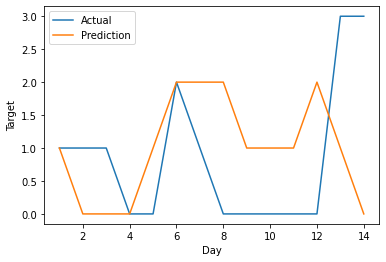

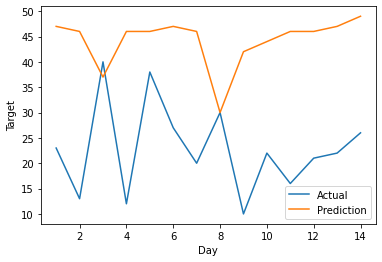

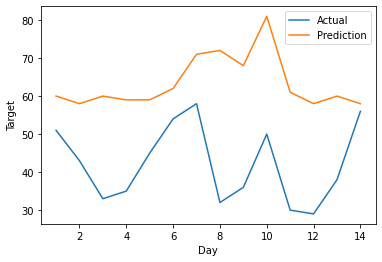

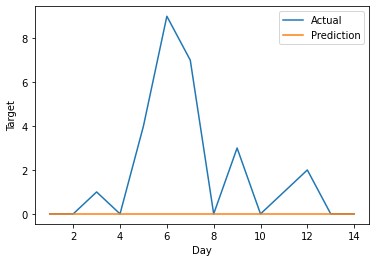

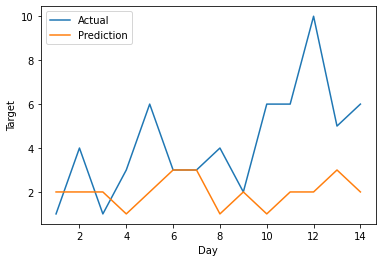

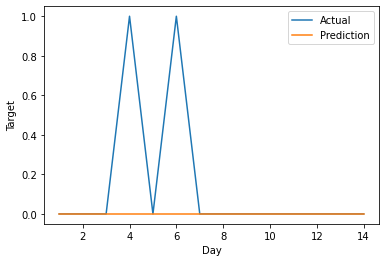

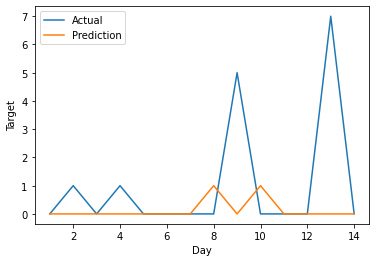

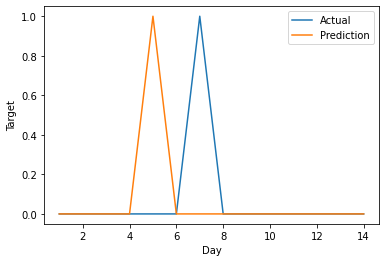

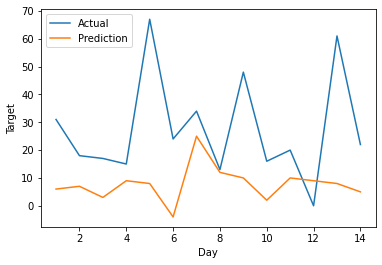

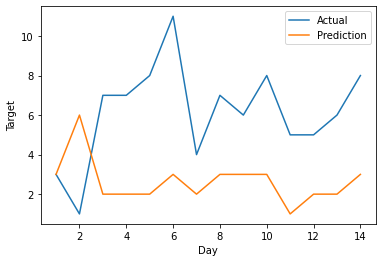

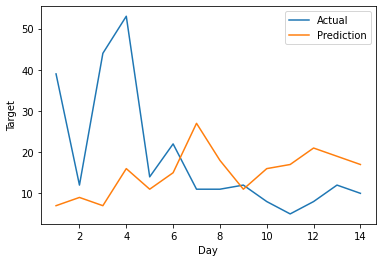

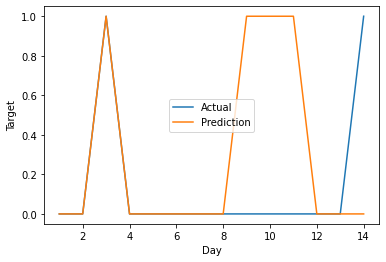

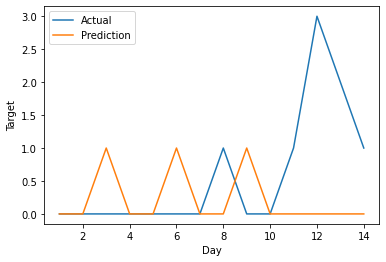

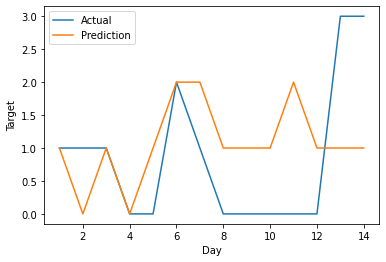

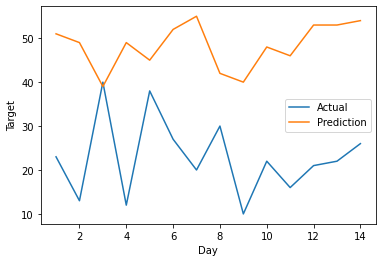

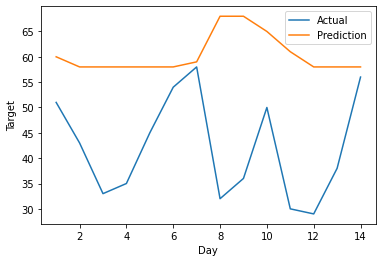

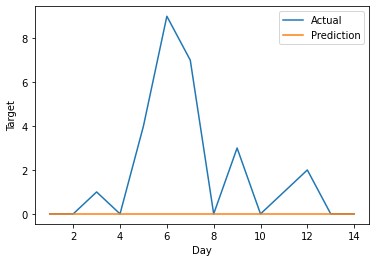

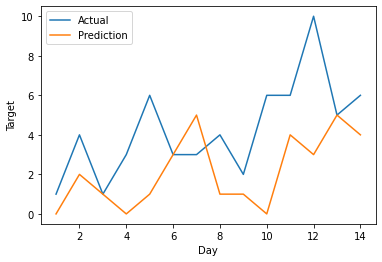

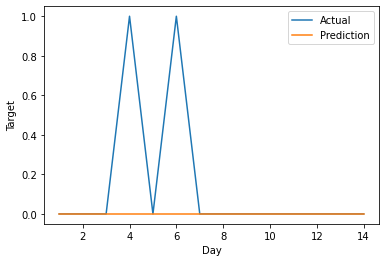

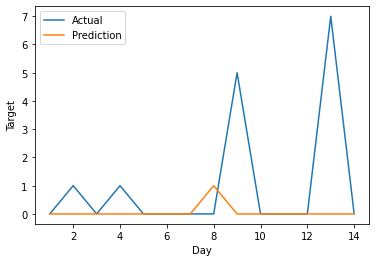

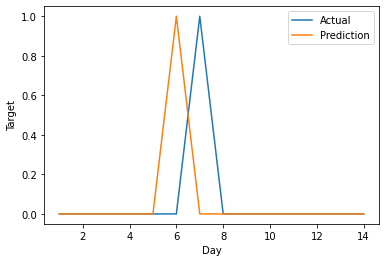

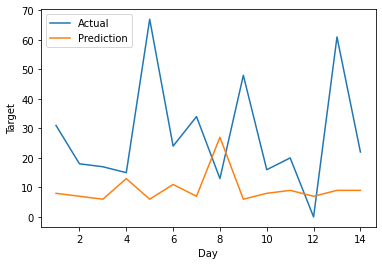

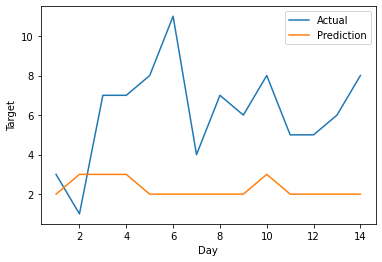

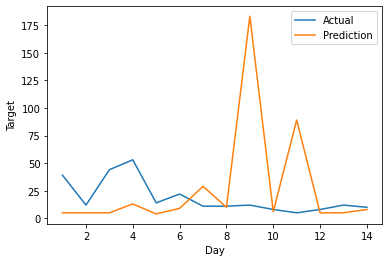

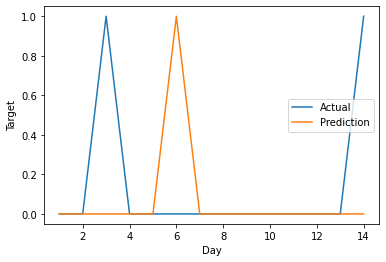

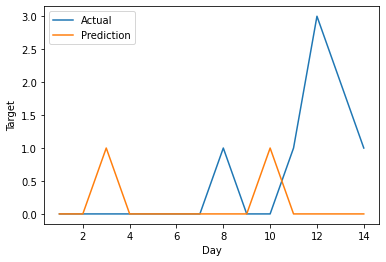

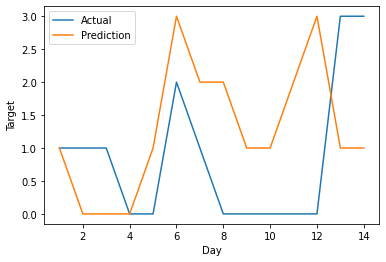

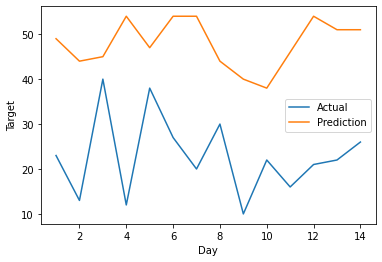

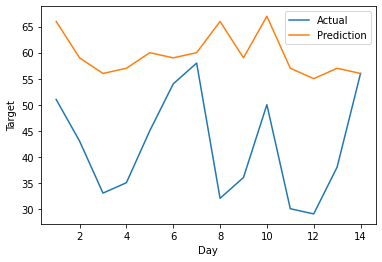

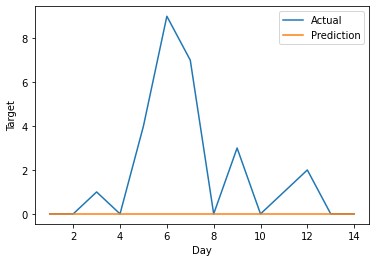

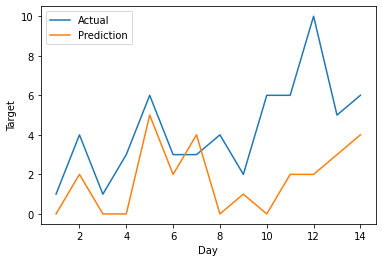

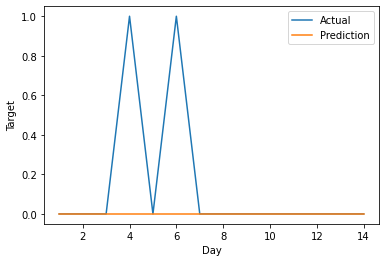

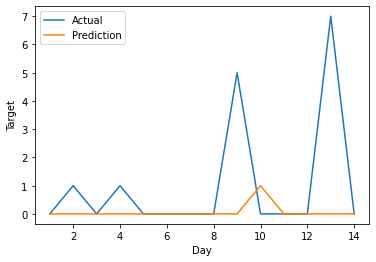

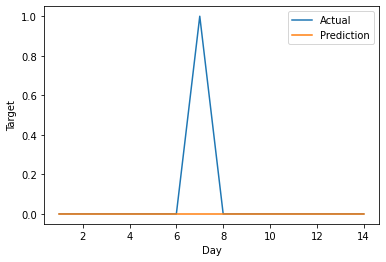

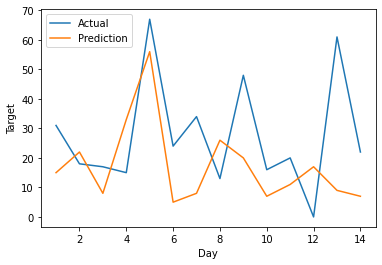

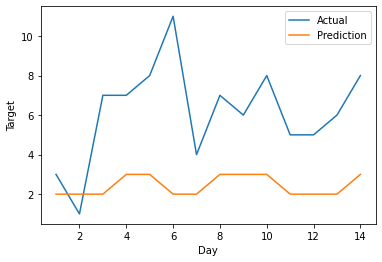

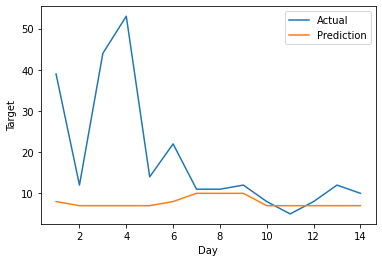

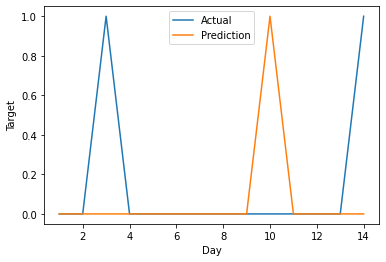

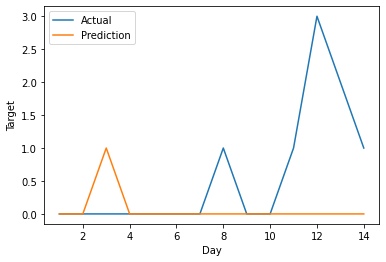

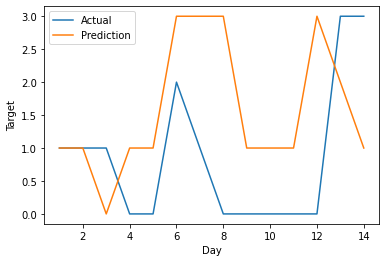

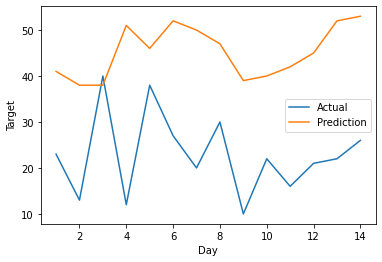

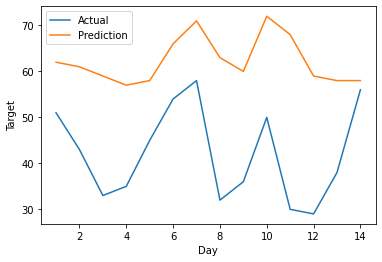

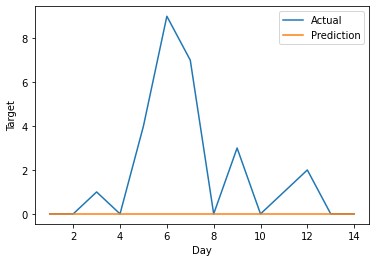

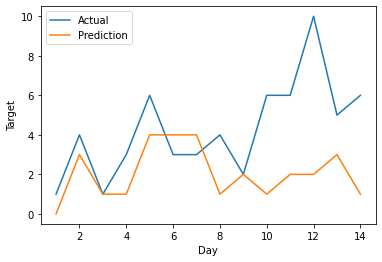

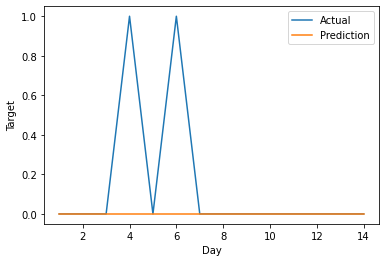

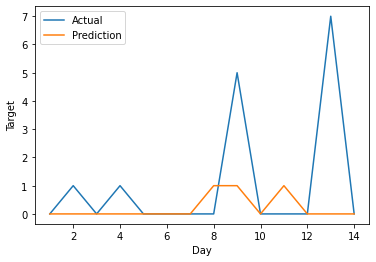

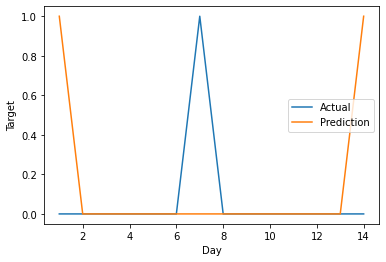

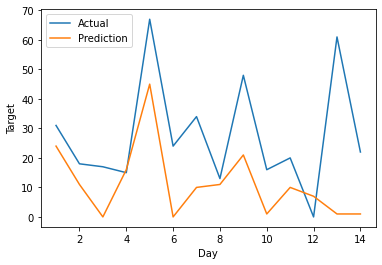

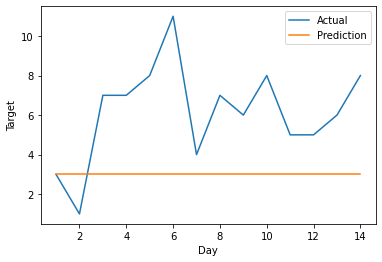

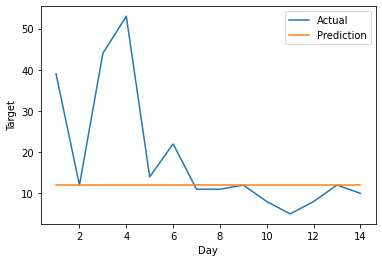

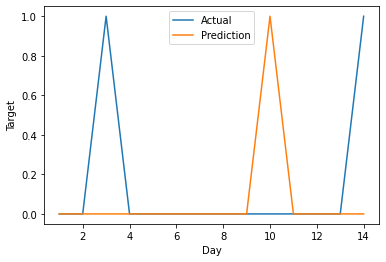

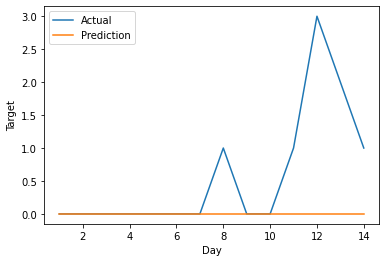

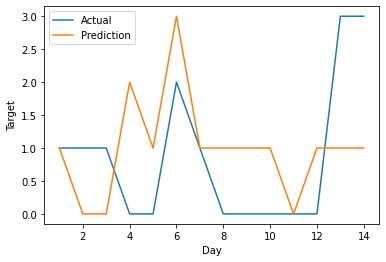

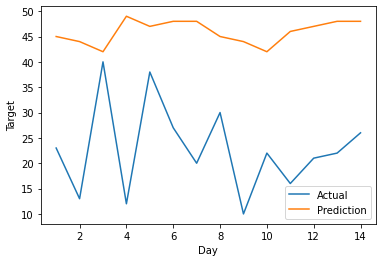

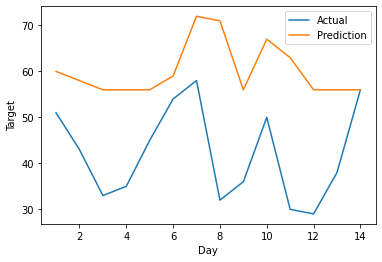

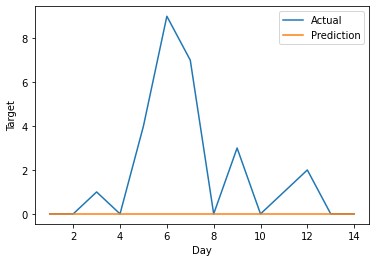

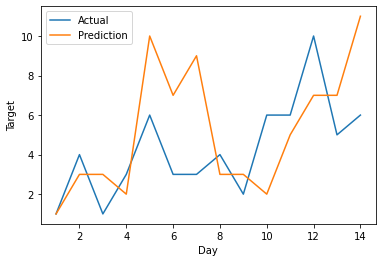

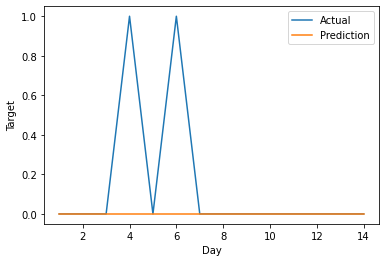

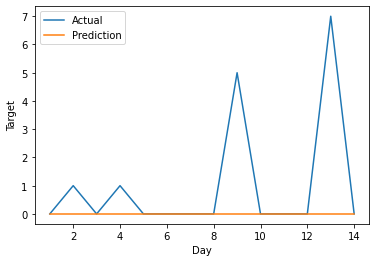

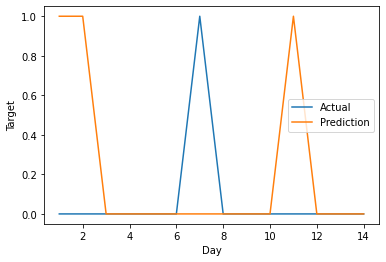

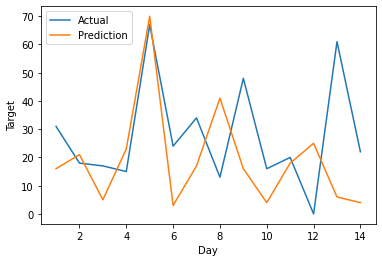

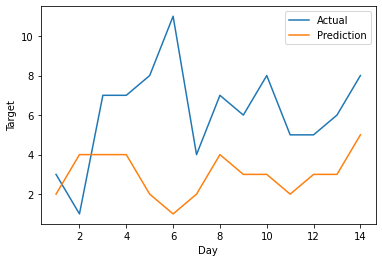

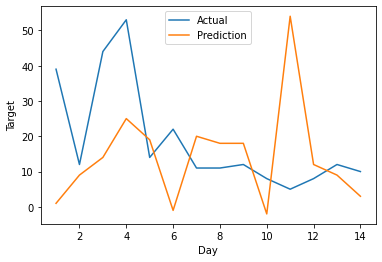

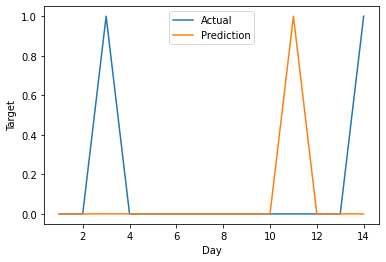

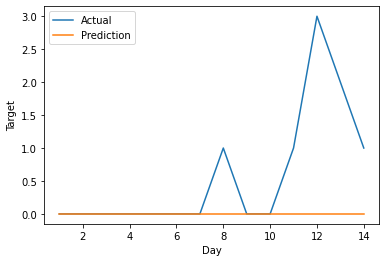

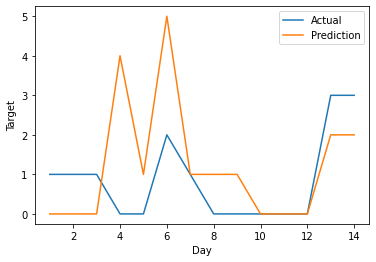

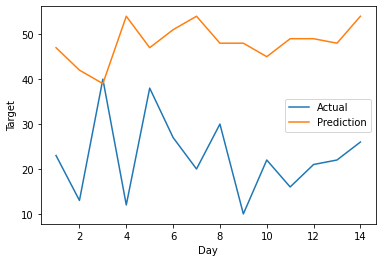

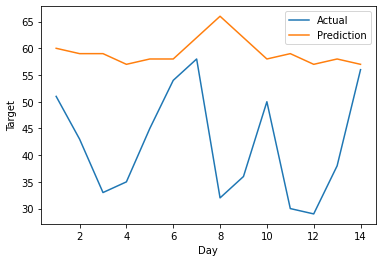

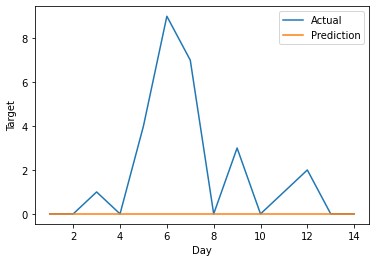

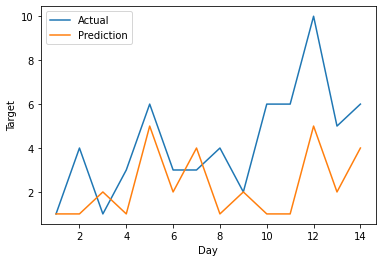

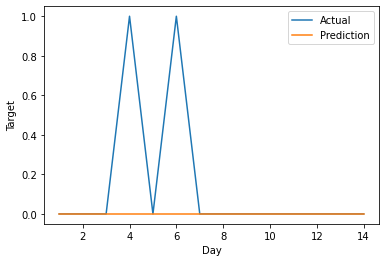

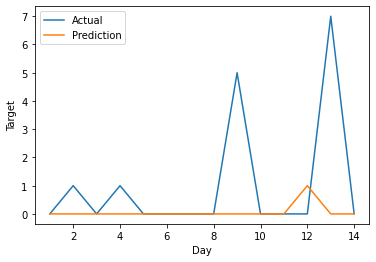

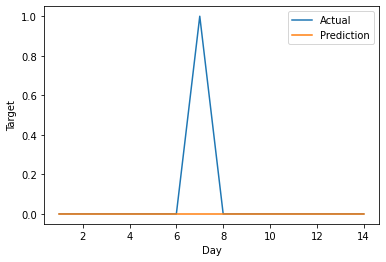

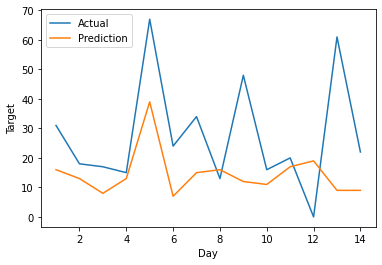

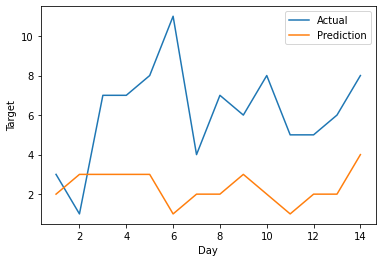

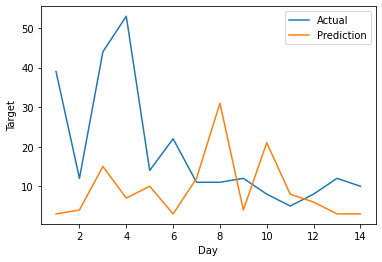

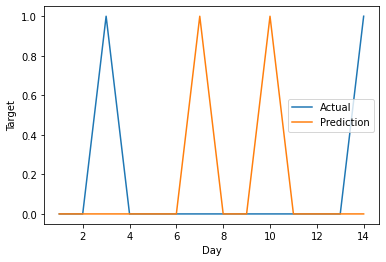

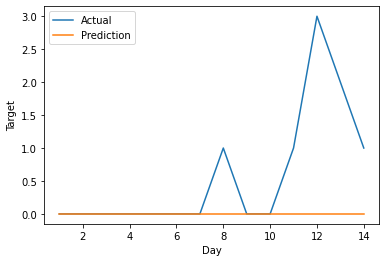

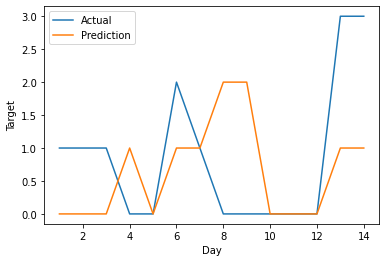

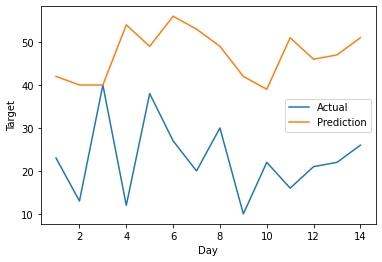

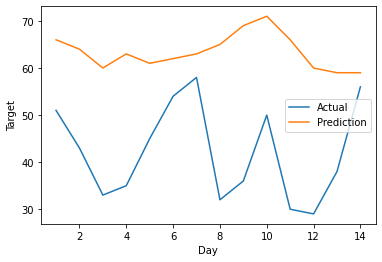

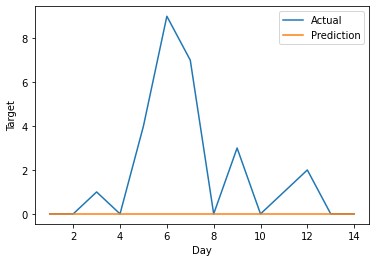

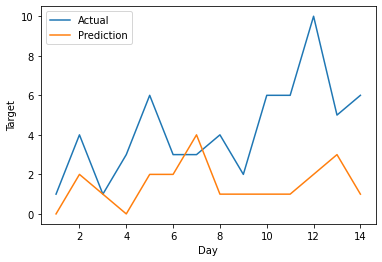

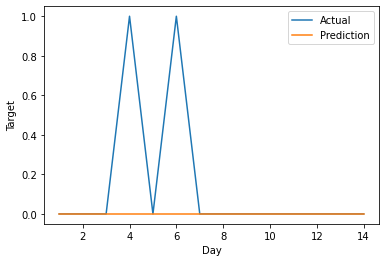

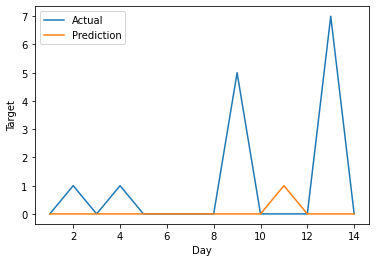

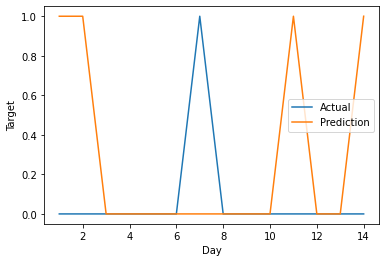

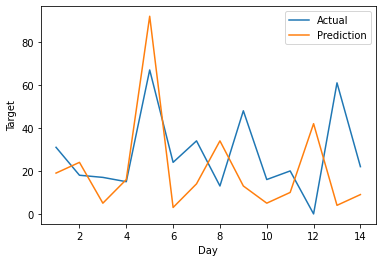

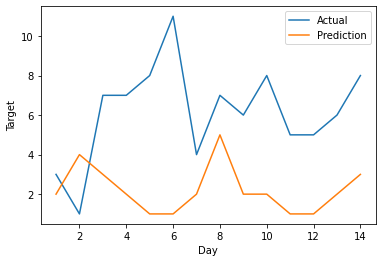

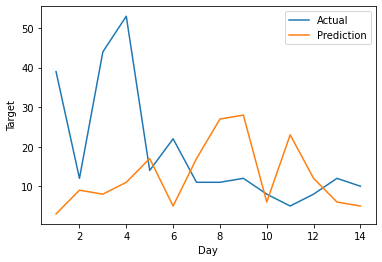

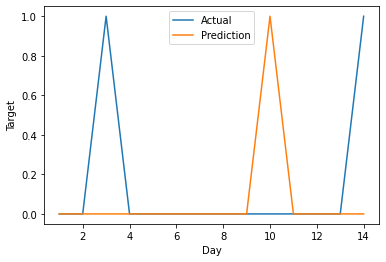

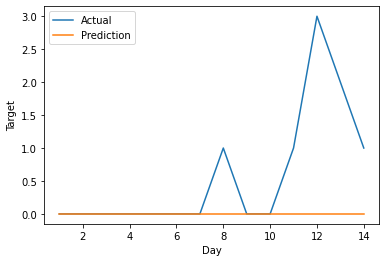

In [ ]:
import makeHistoricalData

r = 14
target = 'confirmed'
full_fixed_data = pd.read_csv('/content/drive/My Drive/full-fixed-data.csv')
fixed_covariates = list(full_fixed_data.columns.values) # this covariates would be deleted from data for train

for h in range(1, 8):
    data = makeHistoricalData.makeHistoricalData(h, r, target, 'mrmr')
    # counties = data.county_fips.unique() # if you want to train the model on all counties
    errors = pd.DataFrame() # we store the errors in this dataframe

    counties = [36043, 36055, 36059, 41053, 45003, 50011, 20169, 21163, 22079, 8035, 37077, 38009, 13033]

    for i in range(len(counties)):
        temporal = data.loc[data['county_fips'] == counties[i]] # we construct the (train, val, test) dataframes from temporal dataframe
        temporal.reset_index(drop=True, inplace=True)

        del temporal['date of day t']
        # del temporal['county_name']
        # del temporal['state_name']
        # del temporal['state_fips']
        # del temporal['county_fips']
        temporal = temporal.drop(fixed_covariates, axis = 1)

        totalNumberOfDays = len(temporal)

        # last 14 days are for test dataset and the rest are for train dataset
        train = temporal.head(totalNumberOfDays-28)
        validation = temporal.loc[totalNumberOfDays-28:totalNumberOfDays-15, :]
        test = temporal.tail(14)

        X_train = train.drop('Target', axis=1)
        y_train = train['Target']

        ####################################### deleting first days that have zero value for target
        index_of_first_nonZero_day = y_train.ne(0).idxmax()
        index_of_first_nonZero_day = index_of_first_nonZero_day - 7
        if index_of_first_nonZero_day > 0 and counties not in [36043, 36055, 36059]:
            X_train = X_train.iloc[index_of_first_nonZero_day:]
            y_train = y_train.iloc[index_of_first_nonZero_day:]
        #######################################

        X_val = validation.drop('Target', axis=1)
        y_val = validation['Target']

        X_test = test.drop('Target', axis=1)
        y_test = test['Target']

        ############################################# Normalizing data
        scalar = preprocessing.MinMaxScaler()

        X_train = X_train.values
        X_train = scalar.fit_transform(X_train)

        X_val = X_val.values
        X_val = scalar.fit_transform(X_val)

        X_test = X_test.values
        X_test = scalar.fit_transform(X_test)

        y_train = y_train.values
        y_train = scalar.fit_transform(y_train.reshape(-1, 1))

        y_val = y_val.values
        y_val = scalar.fit_transform(y_val.reshape(-1, 1))

        # y_test = y_test.values
        # min_max_scaler = preprocessing.MinMaxScaler()
        # y_test = min_max_scaler.fit_transform(y_test.reshape(-1, 1))
        #############################################

        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
        X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

        y_train = y_train.reshape((y_train.shape[0]), )
        y_val = y_val.reshape((y_val.shape[0]), )
        # y_test = y_test.reshape((y_test.shape[0]), )

        print('Working on county_fips = ', counties[i], ' and h = ', h)

        print(X_train.shape, X_val.shape, X_test.shape)
        print(y_train.shape, y_val.shape, y_test.shape)
        
        ############################################# defining the model
        model = Sequential()
        model.add(LSTM(8, return_sequences=True, input_shape=(1, X_train.shape[2])))
        model.add(LSTM(256, dropout=0.2, return_sequences=True))
        model.add(LSTM(256, dropout=0.2, return_sequences=True))
        model.add(LSTM(128, dropout=0.2, return_sequences=True))
        model.add(LSTM(128))
        model.add(Dense(1, activation='selu'))

        # opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
        model.compile (
            loss='mean_squared_error',
            optimizer=keras.optimizers.Adam(0.01)
        )
        ############################################# end of defining the model

        history = model.fit (
            X_train, y_train,
            epochs=50,
            batch_size=128,
            validation_data=(X_val, y_val),
            verbose=1,
            shuffle=False
        )

        # fig = plt.figure()
        # plt.plot(history.history['loss'], label='train')
        # plt.plot(history.history['val_loss'], label='test')
        # plt.xlabel('Epoch')
        # plt.ylabel('Loss')
        # plt.legend()
        # plt.show()
        # fig_name = 'h=' + str(h) + ', county_fips=' + str(counties[i])
        # fig.savefig(fig_name, dpi=600, quality=100)

        # getting the result on test dataset
        pred = model.predict(X_test)
        pred = scalar.inverse_transform(pred.reshape(-1, 1))
        # y_test = scalar.inverse_transform(y_test.reshape(-1, 1))

        y_test = y_test.to_numpy()
        y_test = y_test.reshape(-1, 1)
        pred = pred.reshape(-1, 1)
        pred = np.round(pred)

        ##################################### storing predictinos in a file
        result = pd.DataFrame()
        result['Prediction'] = pred.tolist()
        result['Actual'] = y_test.tolist()
        file_name = '/content/Results/predictions_'+str(counties[i])+'_'+str(h)+'.csv'
        result.to_csv(file_name, mode='w', index=False)
        #####################################

        ##################################### ploting y_test and pred in a same graph
        days = [x for x in range(1,15)]
        fig = plt.figure()
        plt.plot(days, y_test.tolist(), label='Actual')
        plt.plot(days, pred.tolist(), label='Prediction')
        plt.xlabel("Day")
        plt.ylabel("Target")
        plt.legend()
        fig_name = '/content/Plots/'+str(counties[i])+'_'+str(h)+'.png'
        fig.savefig(fig_name, dpi=600)
        #####################################

        pred[pred < 0] = 0
        pred[pred == 0] += 1
        y_test = np.round(y_test)
        y_test[y_test == 0] = 1

        MAE = mean_absolute_error(y_test, pred)
        MSE = (np.square(y_test - pred)).mean(axis=None)
        RMSE = np.sqrt(MSE)        
        MAPE = np.mean(np.abs((y_test - pred) / y_test)) * 100
        r2 = r2_score(y_test, pred)

        key = str(counties[i])+'_'+str(h)
        temp_list = [[key, MAE, MSE, RMSE, MAPE, r2]]
        errors = errors.append(pd.DataFrame(temp_list, columns=['county and h', 'MAE', 'MSE','RMSE', 'MAPE', 'adj_r_squared']), ignore_index=True)

    file_name = '/content/Results/errors_per_county_h='+str(h)+'.csv'
    errors.to_csv(file_name, mode='w', index=False)

In [ ]:
# run this cell to make zip file from results and then download them :)

!zip -r /content/Results.zip /content/Results/
!zip -r /content/Plots.zip /content/Plots/

  adding: content/Results/ (stored 0%)
  adding: content/Results/predictions_38009_2.csv (deflated 77%)
  adding: content/Results/predictions_13033_1.csv (deflated 75%)
  adding: content/Results/predictions_37077_1.csv (deflated 53%)
  adding: content/Results/predictions_8035_5.csv (deflated 61%)
  adding: content/Results/predictions_45003_5.csv (deflated 60%)
  adding: content/Results/predictions_36043_2.csv (deflated 70%)
  adding: content/Results/predictions_20169_3.csv (deflated 76%)
  adding: content/Results/predictions_36055_3.csv (deflated 56%)
  adding: content/Results/predictions_21163_1.csv (deflated 80%)
  adding: content/Results/predictions_41053_4.csv (deflated 73%)
  adding: content/Results/predictions_50011_4.csv (deflated 81%)
  adding: content/Results/predictions_37077_3.csv (deflated 63%)
  adding: content/Results/predictions_8035_3.csv (deflated 70%)
  adding: content/Results/predictions_20169_7.csv (deflated 75%)
  adding: content/Results/predictions_21163_3.csv (de